In [216]:
# System and utility imports
import re
from abc import ABC, abstractmethod
import numpy as np
import pandas as pd

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP imports
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

# Machine learning and preprocessing imports
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import silhouette_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Statistical analysis imports
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import ttest_ind, f_oneway

# ML models
import xgboost as xgb

# Transformers
from transformers import pipeline

# Pandas options
pd.set_option('display.max_columns', None)

In [218]:
df = pd.read_csv("airbnb_data_algeria.csv")
df.head()

,Unnamed: 0,ID,Title,Price,Cleanliness,Accuracy,Check_in,Communication,Location,Value,Overall_rating,n_reviews,Address,Experience,Home_pieces,Additional_fees,Amenities,Response_rate,Rules,Comments,Comments_details
0,0,1,Townhouse in Bouismail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bou Ismaïl, Wilaya de Tipaza, Algeria",4 months hosting,3 guests**** · 1 bedroom**** · 2 beds**** · 1 ...,NaN,Kitchen****BBQ grill****Unavailable: Exterior ...,Response rate: 100%****Responds within an hour,Check-in after 3:00 PM****3 guests maximum****...,NaN,NaN
1,1,2,Chambre Triple,€38,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,"Biskra, Biskra Province, Algeria",2 months hosting,3 guests**** · 1 bedroom**** · 1 bed**** · 1 p...,€ 47 x 5 nights : € 237****Special offer : -€ ...,Outdoor shower****TV****Air conditioning****Ex...,Response rate: 100%****Responds within an hour,Check-in after 3:00 PM****3 guests maximum,NaN,NaN
2,2,3,Clean apartment F3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,"Annaba, Wilaya d'Annaba, Algeria",2 months hosting,6 guests**** · 3 bedrooms**** · 5 beds**** · 1...,NaN,Washer****TV****Air conditioning****Noise deci...,Response rate: 100%****Responds within an hour,Check-in: 2:00 PM - 9:00 PM****Checkout before...,NaN,NaN
3,3,4,the house act be them well,€58,NaN,NaN,NaN,NaN,NaN,NaN,No reviews yet,NaN,"Tighennif, Wilaya de Mascara, Algeria",2 years hosting,6 guests**** · 3 bedrooms**** · 6 beds**** · 1...,€ 58 x 5 nights : € 290****Airbnb service fee ...,TV****Air conditioning****Fire extinguisher***...,NaN,6 guests maximum,NaN,NaN
4,4,5,"Beau Soleil, corner of paradise, feet in the w...",€60,5.0,5.0,5.0,5.0,4.8,5.0,5.0,12,"Plage El Hilel, Wilaya d'Aïn Témouchent, Algeria",Superhost · 1 year hosting,5 guests**** · 2 bedrooms**** · 4 beds**** · 1...,€ 60 x 5 nights : € 300****Cleaning fee : € 15...,Beach view****Sea view****Hair dryer****Cleani...,Response rate: 100%****Responds within a few h...,Check-in after 12:00 PM****Checkout before 2:0...,NaN,[]


In [3]:
df.shape

(2433, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433 entries, 0 to 2432
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2433 non-null   int64  
 1   ID                2433 non-null   int64  
 2   Title             2355 non-null   object 
 3   Price             2042 non-null   object 
 4   Cleanliness       1115 non-null   float64
 5   Accuracy          1115 non-null   float64
 6   Check_in          1115 non-null   float64
 7   Communication     1115 non-null   float64
 8   Location          1115 non-null   float64
 9   Value             1115 non-null   float64
 10  Overall_rating    1951 non-null   object 
 11  n_reviews         1150 non-null   object 
 12  Address           2354 non-null   object 
 13  Experience        2355 non-null   object 
 14  Home_pieces       2355 non-null   object 
 15  Additional_fees   1933 non-null   object 
 16  Amenities         2356 non-null   object 


The DataFrame contains 2433 rows and 20 columns, representing a dataset about rental properties (Airbnb). It contains information on listings, ratings, pricing, reviews, and other descriptive details.

**Key Issues:**

**Missing Data:** Many columns contain null values.

**Data Types:** Several columns are stored as object, though they represent numeric or categorical data. This may hinder analysis.

In [10]:
df.describe()

,Unnamed: 0,ID,Cleanliness,Accuracy,Check_in,Communication,Location,Value
count,2433.000000,2433.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,1216.000000,1217.000000,4.674170,4.716143,4.786816,4.853632,4.649238,4.642780
std,702.490925,702.490925,0.396502,0.360492,0.305862,0.258522,0.360240,0.382927
min,0.000000,1.000000,1.500000,2.300000,2.300000,2.300000,2.300000,2.200000
25%,608.000000,609.000000,4.600000,4.600000,4.700000,4.800000,4.500000,4.500000
50%,1216.000000,1217.000000,4.800000,4.800000,4.900000,4.900000,4.800000,4.800000
75%,1824.000000,1825.000000,5.000000,5.000000,5.000000,5.000000,4.900000,4.900000
max,2432.000000,2433.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## **1. General Observations**
**Total Rows** (count): There are **2,433** entries, but only **1,115** rows have valid ratings for `Cleanliness`, `Accuracy`, `Check_in`, `Communication`, `Location`, and `Value`.
* This suggests missing data in the ratings columns.

## **2. Rating Metrics**
Each rating category (`Cleanliness`, `Accuracy`, `Check_in`, `Communication`, `Location`, and `Value`) has values ranging between **1.5** and **5**, which aligns with typical rating scales. Key points for each:

**Means:**

* All means are close to **4.6**–**4.8**, indicating generally high ratings for most properties.
* **Highest mean:** `Communication` **(4.854)**, suggesting it is the strongest attribute of these properties.
* **Lowest mean:** `Value` **(4.643)**, indicating this is the least satisfactory aspect.

**Standard Deviations (std):**

* All standard deviations are relatively low (around **0.25**–**0.4**), which implies low variability and a consistent rating pattern.

**Minimum Ratings:**

* The lowest values (e.g., **1.5** for `Cleanliness` and **2.3** for others) indicate that some properties received poor reviews.
  
**Quartiles (25%, 50%, 75%):**

* **Median (50%)** ratings for most categories are **4.8** or higher, showing that the majority of properties are rated positively.
* **75%** of ratings are at the maximum value **(5.0)** in all categories, confirming the high overall satisfaction.


Visualizing Missing Values...


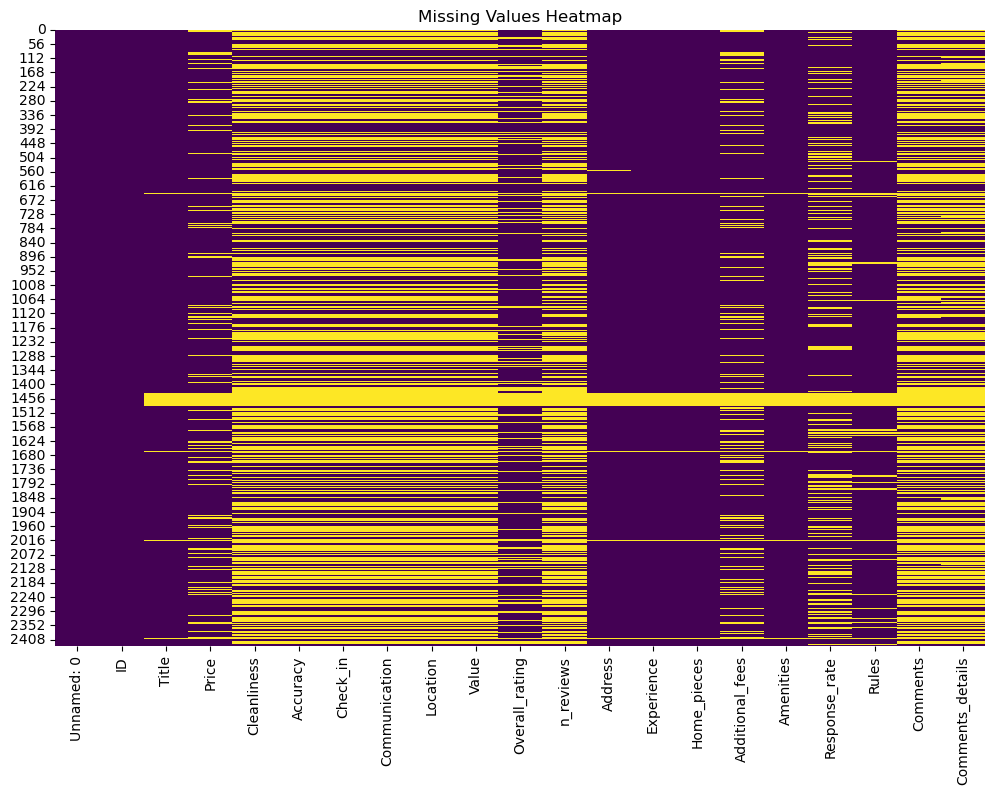

In [12]:
def visualize_missing_values(df):
    print("\nVisualizing Missing Values...")
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.show()
    
visualize_missing_values(df)

The dataset has significant missing values in many columns, but the distribution varies between columns.


## **1. Key Insights from the Heatmap**
 
### **a. Columns with Few Missing Values**

`ID` column have no missing values.

`Title`, `Address`, `Experience`, `Home_pieces`, `Amenities`, and `Rules`: These columns have relatively few missing values (mostly consistent purple).


### **b. Columns with Moderate Missing Values**

`Price`, `Overall_rating`, and `Response_rate`: These columns have moderate missing values.

Missing rows are scattered (non-contiguous), suggesting inconsistent data collection.

`Additional_fees`: Missing values appear consistently but are less frequent compared to other columns.

### **c. Columns with Significant Missing Values**

`Cleanliness`, `Accuracy`, `Check_in`, `Communication`, `Location`, `Value`: These columns are ratings-based and have significant missing values (almost half the dataset is yellow in these columns).

* Missingness seems widespread and scattered.

* This might indicate that not all entries include user ratings.

`n_reviews`: Contains a large block of missing values (yellow streak in the middle).

* Could signify a group of properties with no reviews at all.

`Comments` and `Comments_details`: These textual columns have extensive missing values.

* Missing data is widely distributed and significant.

### **d. Patterns of Missing Data**

**1. Widespread Missingness:**

Columns like `Cleanliness`, `n_reviews`, and `Comments` have missing data spread across most of the rows, suggesting an incomplete subset of data.

**2. Blocks of Missing Values:**

For `n_reviews`, a distinct horizontal block of missing data suggests a group of entries with no reviews or ratings (e.g., new or inactive listings).

**3. Scattered Missingness:**

Columns like `Price`, `Overall_rating`, and `Response_rate` have missing values that are distributed more irregularly.

In [14]:
df.head()

,Unnamed: 0,ID,Title,Price,Cleanliness,Accuracy,Check_in,Communication,Location,Value,Overall_rating,n_reviews,Address,Experience,Home_pieces,Additional_fees,Amenities,Response_rate,Rules,Comments,Comments_details
0,0,1,Townhouse in Bouismail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bou Ismaïl, Wilaya de Tipaza, Algeria",4 months hosting,3 guests**** · 1 bedroom**** · 2 beds**** · 1 ...,NaN,Kitchen****BBQ grill****Unavailable: Exterior ...,Response rate: 100%****Responds within an hour,Check-in after 3:00 PM****3 guests maximum****...,NaN,NaN
1,1,2,Chambre Triple,€38,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,"Biskra, Biskra Province, Algeria",2 months hosting,3 guests**** · 1 bedroom**** · 1 bed**** · 1 p...,€ 47 x 5 nights : € 237****Special offer : -€ ...,Outdoor shower****TV****Air conditioning****Ex...,Response rate: 100%****Responds within an hour,Check-in after 3:00 PM****3 guests maximum,NaN,NaN
2,2,3,Clean apartment F3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,"Annaba, Wilaya d'Annaba, Algeria",2 months hosting,6 guests**** · 3 bedrooms**** · 5 beds**** · 1...,NaN,Washer****TV****Air conditioning****Noise deci...,Response rate: 100%****Responds within an hour,Check-in: 2:00 PM - 9:00 PM****Checkout before...,NaN,NaN
3,3,4,the house act be them well,€58,NaN,NaN,NaN,NaN,NaN,NaN,No reviews yet,NaN,"Tighennif, Wilaya de Mascara, Algeria",2 years hosting,6 guests**** · 3 bedrooms**** · 6 beds**** · 1...,€ 58 x 5 nights : € 290****Airbnb service fee ...,TV****Air conditioning****Fire extinguisher***...,NaN,6 guests maximum,NaN,NaN
4,4,5,"Beau Soleil, corner of paradise, feet in the w...",€60,5.0,5.0,5.0,5.0,4.8,5.0,5.0,12,"Plage El Hilel, Wilaya d'Aïn Témouchent, Algeria",Superhost · 1 year hosting,5 guests**** · 2 bedrooms**** · 4 beds**** · 1...,€ 60 x 5 nights : € 300****Cleaning fee : € 15...,Beach view****Sea view****Hair dryer****Cleani...,Response rate: 100%****Responds within a few h...,Check-in after 12:00 PM****Checkout before 2:0...,NaN,[]


From the dataset snippet, we can identify several columns with combined information that can be split into multiple distinct fields for improved clarity and usability.

**Split Columns:**

 * Address → City, Province, Country.
 * Experience → Hosting_Duration, Superhost_Status.
 * Additional_fees → Total_Nights, Cleaning_Fee, Service_Fee.
 * Home_pieces → Max_Guests, Bedrooms, Beds, Bathrooms.
 * Response_rate → Response_Rate_Percentage, Response_Time.
   
These transformations will make the data more structured and easier to analyze.


From the Price column observation, the values contain the "€" symbol, which makes the data non-numeric. To perform analysis (e.g., calculating averages, trends, or aggregations), the Price column needs to be cleaned and converted to a numeric format.



The comments_details column contains rich information about guest feedback, including the rating, date of the comment, and duration of stay. To better analyze and utilize this data, we will extract these details into a new DataFrame. This DataFrame will include the following columns:

1. **Listing ID**: A unique identifier for each listing to maintain a connection to the original dataset.
2. **Rating**: The guest's rating for their stay.
3. **Date**: The date the comment was submitted, which can be used for time-series analysis or to identify trends over time.
4. **Duration**: The length of the guest’s stay, providing insights into booking patterns or guest preferences.

In [16]:
df[df['Title'].isna()]

,Unnamed: 0,ID,Title,Price,Cleanliness,Accuracy,Check_in,Communication,Location,Value,Overall_rating,n_reviews,Address,Experience,Home_pieces,Additional_fees,Amenities,Response_rate,Rules,Comments,Comments_details
381,381,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521,521,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,645,646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,646,647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,647,648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,2017,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2118,2118,2119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2261,2261,2262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2403,2403,2404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We observe that 78 rows have all columns filled with NaN values.

* These rows contain no information at all.

* Rows where all columns are NaN do not contribute any value or insight to the dataset.

* Dropping these rows will:
  * Reduce noise in the dataset.
  * Ensure cleaner and more meaningful data for analysis.
  * Improve computational efficiency during analysis and modeling.

In [18]:
df[df['Cleanliness'].isna()]

,Unnamed: 0,ID,Title,Price,Cleanliness,Accuracy,Check_in,Communication,Location,Value,Overall_rating,n_reviews,Address,Experience,Home_pieces,Additional_fees,Amenities,Response_rate,Rules,Comments,Comments_details
0,0,1,Townhouse in Bouismail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bou Ismaïl, Wilaya de Tipaza, Algeria",4 months hosting,3 guests**** · 1 bedroom**** · 2 beds**** · 1 ...,NaN,Kitchen****BBQ grill****Unavailable: Exterior ...,Response rate: 100%****Responds within an hour,Check-in after 3:00 PM****3 guests maximum****...,NaN,NaN
1,1,2,Chambre Triple,€38,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,"Biskra, Biskra Province, Algeria",2 months hosting,3 guests**** · 1 bedroom**** · 1 bed**** · 1 p...,€ 47 x 5 nights : € 237****Special offer : -€ ...,Outdoor shower****TV****Air conditioning****Ex...,Response rate: 100%****Responds within an hour,Check-in after 3:00 PM****3 guests maximum,NaN,NaN
2,2,3,Clean apartment F3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,"Annaba, Wilaya d'Annaba, Algeria",2 months hosting,6 guests**** · 3 bedrooms**** · 5 beds**** · 1...,NaN,Washer****TV****Air conditioning****Noise deci...,Response rate: 100%****Responds within an hour,Check-in: 2:00 PM - 9:00 PM****Checkout before...,NaN,NaN
3,3,4,the house act be them well,€58,NaN,NaN,NaN,NaN,NaN,NaN,No reviews yet,NaN,"Tighennif, Wilaya de Mascara, Algeria",2 years hosting,6 guests**** · 3 bedrooms**** · 6 beds**** · 1...,€ 58 x 5 nights : € 290****Airbnb service fee ...,TV****Air conditioning****Fire extinguisher***...,NaN,6 guests maximum,NaN,NaN
7,7,8,apartment rental with sea view,€32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Mostaganem, Wilaya de Mostaganem, Algeria",4 months hosting,7 guests**** · 2 bedrooms**** · 6 beds**** · 1...,€ 40 x 5 nights : € 199****Special offer : -€ ...,Washer****TV****Air conditioning****Exterior s...,Response rate: 100%****Responds within an hour,7 guests maximum,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,2425,2426,"luxury apartment,bvd des lions",€42,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,"Bir El Djir, Oran Province, Algeria",1 month hosting,5 guests**** · 2 bedrooms**** · 3 beds**** · 2...,€ 42 x 5 nights : € 210****Airbnb service fee ...,Hair dryer****Cleaning products****Shampoo****...,Response rate: 100%****Responds within a few h...,5 guests maximum,NaN,NaN
2426,2426,2427,Charming F2 Tlemcen Downtown,€22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Tlemcen, Wilaya de Tlemcen, Algeria",2 years hosting,5 guests**** · 2 bedrooms**** · 4 beds**** · 1...,€ 27 x 5 nights : € 135****Special offer : -€ ...,Kitchen****Free parking on premises****Unavail...,NaN,NaN,NaN,NaN
2428,2428,2429,"Apparently T4, on the 4th floor.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,No reviews yet,NaN,"Stidia, Mostaganem Province, Algeria",10 months hosting,4 guests**** · 1 bedroom**** · 1 bed**** · 1 bath,NaN,Washer****TV****Air conditioning****Wifi****De...,Responds within a few days or more,Check-in: 8:00 AM - 1:00 AM****Checkout before...,NaN,NaN
2429,2429,2430,villa level apartment,€105,NaN,NaN,NaN,NaN,NaN,NaN,No reviews yet,NaN,"Mostaganem, Wilaya de Mostaganem, Algeria",7 months hosting,6 guests**** · 3 bedrooms**** · 6 beds**** · 1...,€ 105 x 5 nights : € 524****Airbnb service fee...,Washer****TV****Air conditioning****Smoke alar...,Response rate: 100%****Responds within an hour,6 guests maximum,NaN,NaN


**1. Relationship Between Missing Values**

Rows with missing values in columns:
* Cleanliness, Accuracy, Check_in, Communication, Location, Value
* Also have missing values in: n_reviews, Overall_rating, Comments, and Comments_details.
* 
This indicates a strong correlation between the absence of reviews and the missing ratings/feedback fields.

**2. Reason for Missingness**
The missing values in these columns are not due to incomplete data collection but rather because no reviews exist yet for these listings.
Listings without user reviews naturally have no scores for Cleanliness, Accuracy, etc., since these ratings are derived from user feedback.

Similarly, there are no entries in n_reviews (number of reviews), Overall_rating (aggregated score), and Comments (user feedback) for these rows.

**3. Supporting Observations**

Listings with missing ratings (e.g., Cleanliness, Value) often have:
"No reviews yet" or "New" under the Overall_rating column, further reinforcing that no feedback exists for these properties.

**4. Implications for Data Analysis**

The missing values are systematic and explainable:

Listings without reviews will have missing entries for all review-based metrics (e.g., Cleanliness, Comments).

Missing values here are not errors but rather a result of the natural absence of user feedback. It can be kept as they are for analysis, or
imputed with placeholder values (e.g., 0 for n_reviews and NaN for scores).

**Insights:**

These rows likely represent new or inactive listings that have not yet received reviews from users.

# Data Cleaning

In [220]:
import importlib
import airbnb_data_cleaner
importlib.reload(airbnb_data_cleaner)
from airbnb_data_cleaner import AirbnbDataCleaner

#df = pd.read_csv('full_airbnb_data.csv')
cleaner = AirbnbDataCleaner(df)
cleaned_df, comments_df = cleaner.clean_airbnb_data()

In [22]:
cleaned_df.shape

(2348, 27)

In [24]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2348 entries, 0 to 2432
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2348 non-null   int64  
 1   Title               2348 non-null   object 
 2   Price               2037 non-null   float64
 3   Cleanliness         1111 non-null   float64
 4   Accuracy            1111 non-null   float64
 5   Check_in            1111 non-null   float64
 6   Communication       1111 non-null   float64
 7   Location            1111 non-null   float64
 8   Value               1111 non-null   float64
 9   Overall_rating      1111 non-null   float64
 10  n_reviews           2348 non-null   int32  
 11  Comments            1110 non-null   object 
 12  n_guest             2246 non-null   float64
 13  n_bedroom           2243 non-null   float64
 14  n_bed               2278 non-null   float64
 15  n_bath              2245 non-null   float64
 16  renamed_ame

In [26]:
comments_df.head()

,ID,Rating,Date,Duration
0,6,4.0,November 2024,a few nights
1,6,5.0,July 2024,a few nights
2,6,5.0,June 2024,a few nights
3,6,4.0,May 2024,over a week
4,7,5.0,November 2024,one night


# Data Analysis

## General Overview

In [221]:
df = cleaned_df.copy()

In [193]:
df.head()

,ID,Title,Price,Cleanliness,Accuracy,Check_in,Communication,Location,Value,Overall_rating,n_reviews,Comments,n_guest,n_bedroom,n_bed,n_bath,renamed_amenities,City,Province,superhost,host_experience,response_rate,response_time,Price_per_night,Nights,Cleaning_fee,Airbnb_service_fee,Price_log,cleaned_review,sentiment_score,sentiment_category,amenities,Rating_Category
0,1,Townhouse in Bouismail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3.0,1.0,2.0,1.0,"[Family Kitchen & Outdoor Dining, BBQ Grills]",Bou Ismail,Tipaza,0,0.3,100.0,within an hour,0,0,0,0,NaN,NaN,NaN,None,"[Family Kitchen & Outdoor Dining, BBQ Grills]",NaN
1,2,Chambre Triple,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3.0,1.0,1.0,1.0,"[Entertainment, TVs, Parking Facilities, Comfo...",Biskra,Biskra,0,0.2,100.0,within an hour,47,5,0,35,3.663562,NaN,NaN,None,"[Entertainment, TVs, Parking Facilities, Comfo...",NaN
2,3,Clean apartment F3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,6.0,3.0,5.0,1.0,"[Entertainment, TVs, Parking Facilities, Comfo...",Annaba,Annaba,0,0.2,100.0,within an hour,0,0,0,0,NaN,NaN,NaN,None,"[Entertainment, TVs, Parking Facilities, Comfo...",NaN
3,4,the house act be them well,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,6.0,3.0,6.0,1.0,"[Entertainment, TVs, Parking Facilities, Comfo...",Tighennif,Mascara,0,2.0,NaN,NaN,58,5,0,53,4.077537,NaN,NaN,None,"[Entertainment, TVs, Parking Facilities, Comfo...",NaN
4,5,"Beau Soleil, corner of paradise, feet in the w...",60.0,5.0,5.0,5.0,5.0,4.8,5.0,5.0,12,NaN,5.0,2.0,4.0,1.0,"[Coffee Makers, Children’s Books and Toys, Fri...",Plage El Hilel,Ain Temouchent,1,1.0,100.0,within a few hours,60,5,15,54,4.110874,NaN,NaN,None,"[Coffee Makers, Children’s Books and Toys, Fri...",Excellent (4.8-5)


In [32]:
df.describe()

,ID,Price,Cleanliness,Accuracy,Check_in,Communication,Location,Value,Overall_rating,n_reviews,n_guest,n_bedroom,n_bed,n_bath,superhost,host_experience,response_rate,Price_per_night,Nights,Cleaning_fee,Airbnb_service_fee
count,2348.000000,2037.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,2348.000000,2246.000000,2243.000000,2278.000000,2245.000000,2348.000000,2348.000000,1691.000000,2348.000000,2348.000000,2348.000000,2348.000000
mean,1210.733816,48.067619,4.673447,4.716022,4.786499,4.853285,4.648875,4.642574,4.718434,8.973595,5.519590,2.416852,4.816945,1.286860,0.198893,2.382240,95.350680,45.766184,4.068143,3.741482,38.424617
std,710.323733,38.089077,0.396910,0.360599,0.306326,0.258871,0.360300,0.382802,0.348846,17.992689,2.322029,2.477485,5.702886,1.991656,0.399252,2.501653,12.996792,177.309436,1.920124,8.979361,149.335993
min,1.000000,4.570000,1.500000,2.300000,2.300000,2.300000,2.300000,2.200000,2.330000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,589.750000,30.000000,4.600000,4.600000,4.700000,4.800000,4.500000,4.500000,4.630000,0.000000,4.000000,2.000000,3.000000,1.000000,0.000000,0.500000,100.000000,24.000000,5.000000,0.000000,19.000000
50%,1192.500000,39.000000,4.800000,4.800000,4.900000,4.900000,4.700000,4.700000,4.810000,0.000000,5.000000,2.000000,4.000000,1.000000,0.000000,1.000000,100.000000,35.000000,5.000000,0.000000,30.000000
75%,1839.250000,53.000000,5.000000,5.000000,5.000000,5.000000,4.900000,4.900000,5.000000,10.000000,6.000000,3.000000,5.000000,1.000000,0.000000,3.000000,100.000000,50.000000,5.000000,0.000000,43.000000
max,2433.000000,800.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,190.000000,16.000000,50.000000,50.000000,41.000000,1.000000,13.000000,100.000000,6172.000000,7.000000,100.000000,5698.000000


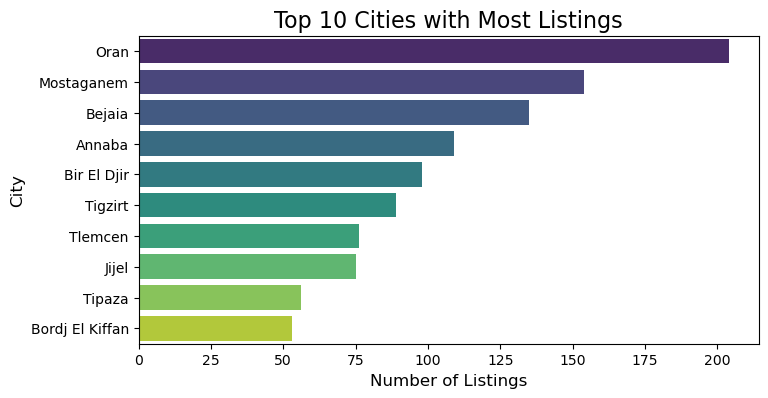

In [34]:
top_cities = df['City'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Cities with Most Listings', fontsize=16)
plt.xlabel('Number of Listings', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

* The top 10 cities with the most listings are visualized, showing which areas have a strong Airbnb presence.
* This can help identify the most popular destinations.


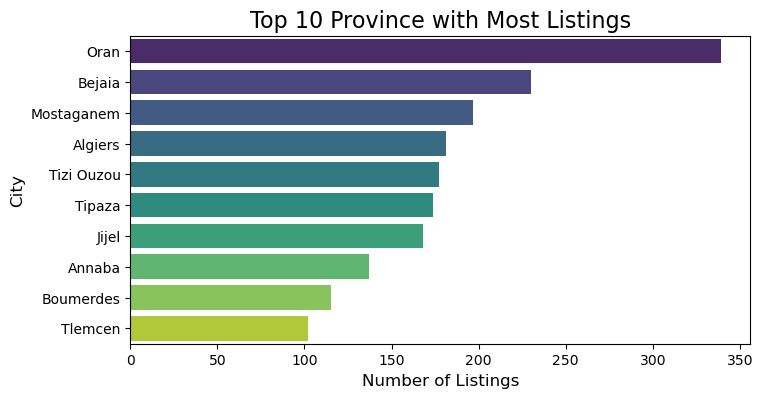

In [36]:
top_cities = df['Province'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Province with Most Listings', fontsize=16)
plt.xlabel('Number of Listings', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

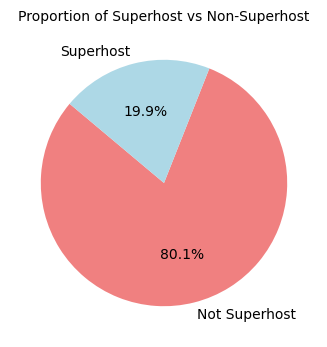

In [38]:
superhost_counts = df['superhost'].value_counts(normalize=True)
labels = ['Not Superhost', 'Superhost']
plt.figure(figsize=(8, 4))
plt.pie(superhost_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'])
plt.title('Proportion of Superhost vs Non-Superhost', fontsize=10)
plt.show()

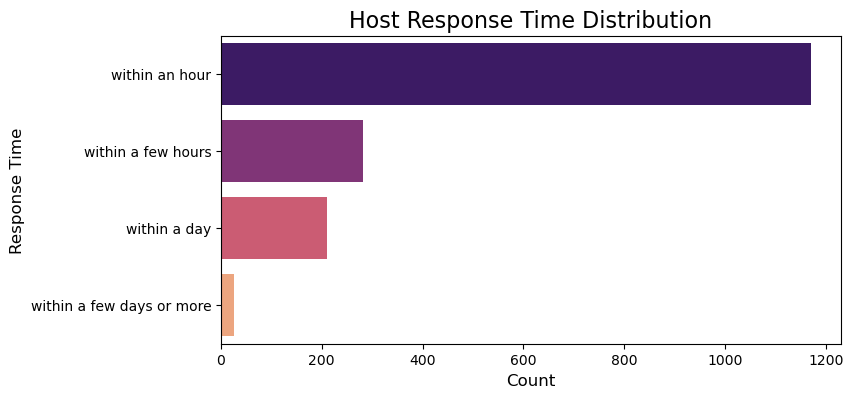

In [40]:
plt.figure(figsize=(8, 4))
sns.countplot(y=df['response_time'], order=df['response_time'].value_counts().index, palette='magma')
plt.title('Host Response Time Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Response Time', fontsize=12)
plt.show()

* Most hosts respond "within an hour" or "within a few hours," which reflects good responsiveness.
* A few listings have "a day or more" response times, but they are in the minority.


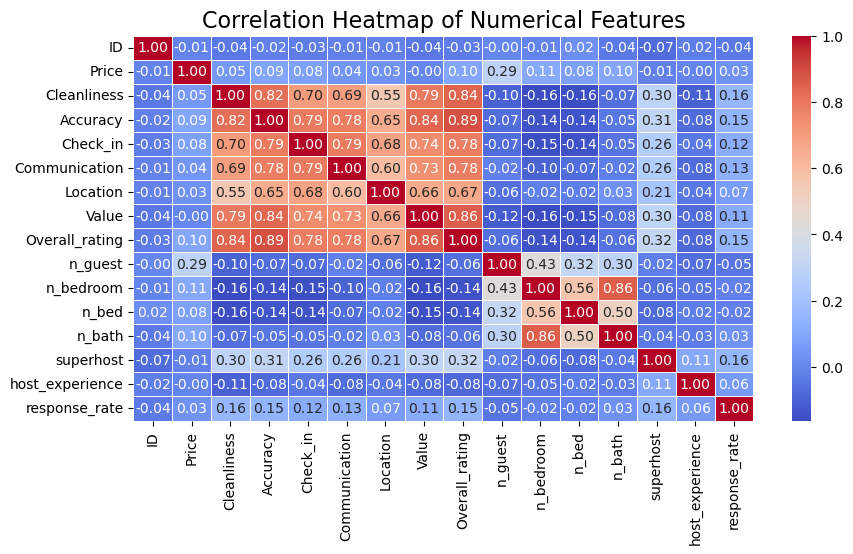

In [42]:
plt.figure(figsize=(10, 5))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

**General Insights:**

* The overall rating is significantly influenced by features like cleanliness, accuracy, and value.
* Price is driven by practical factors like the number of guests and the service fee, with weaker links to subjective metrics like ratings.
* Service fees are closely tied to price and the number of guests.
* Properties managed by superhosts perform slightly better across ratings and cleanliness.

## Price Analysis

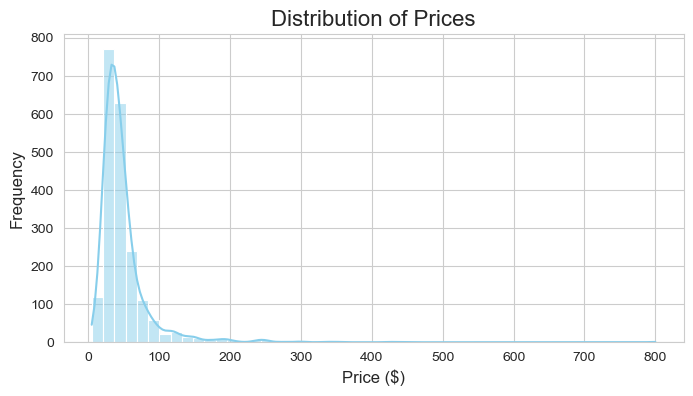

In [44]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 4))
sns.histplot(df['Price'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

* Most listings have prices concentrated at the lower end, with a few high-end outliers.
* The distribution is right-skewed, indicating that most prices are on the lower side.

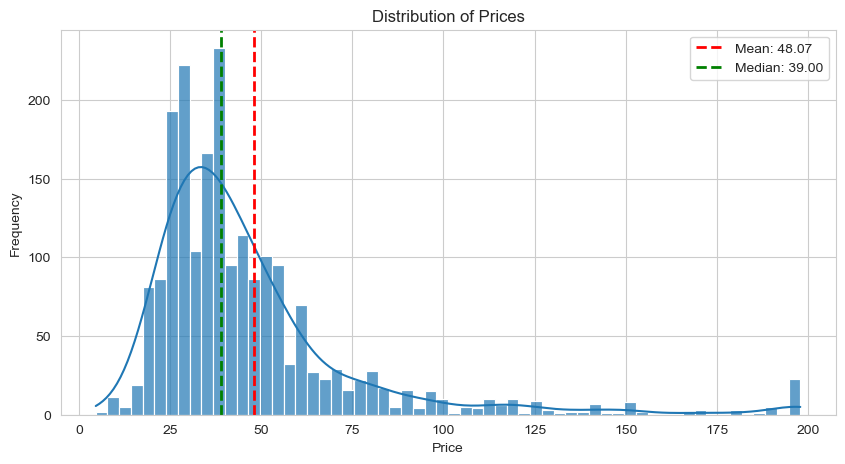

In [46]:
# Plot histogram
upper_limit = df['Price'].quantile(0.99)
price = np.where(df['Price'] > upper_limit, upper_limit, df['Price'])

plt.figure(figsize=(10, 5))
sns.histplot(price, bins=60, kde=True, alpha=0.7)

# Correct calculation of mean and median for NumPy array
mean_price = df['Price'].mean()
median_price = df['Price'].median()

plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_price:.2f}")
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_price:.2f}")

plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

The distribution is positively skewed, indicated by the tail extending towards the higher price values. Most prices are concentrated on the left side of the histogram, with fewer occurrences of higher prices.

The highest frequency of prices is in the range of 20 to 40, suggesting that many items are priced within this range.

This value, marked by the green dashed line, represents the middle value when the prices are sorted. It shows that half of the prices are below 39 and half are above.

The mean is significantly higher than the median, marked by the red dashed line. This suggests that there are some higher price values (outliers) that pull the average up, which is characteristic of a positively skewed distribution.

There's a sharp drop in frequency as prices increase past 50, highlighting that higher-priced items are less common.

Given the disparity between the mean and median, it may be more appropriate to use the median as a measure of central tendency for analysis, as it is less affected by outliers.

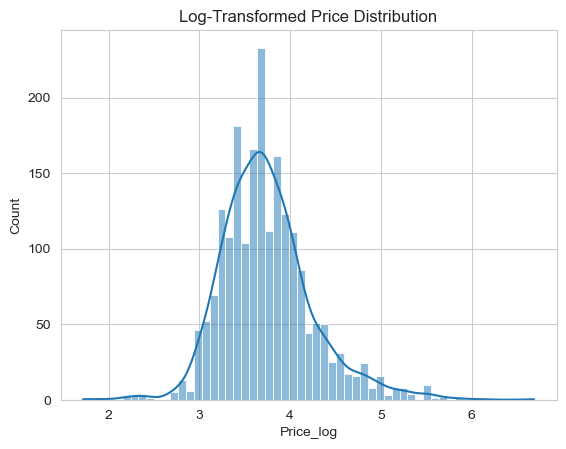

In [48]:
df['Price_log'] = np.log1p(df['Price'])
sns.histplot(df['Price_log'], kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()

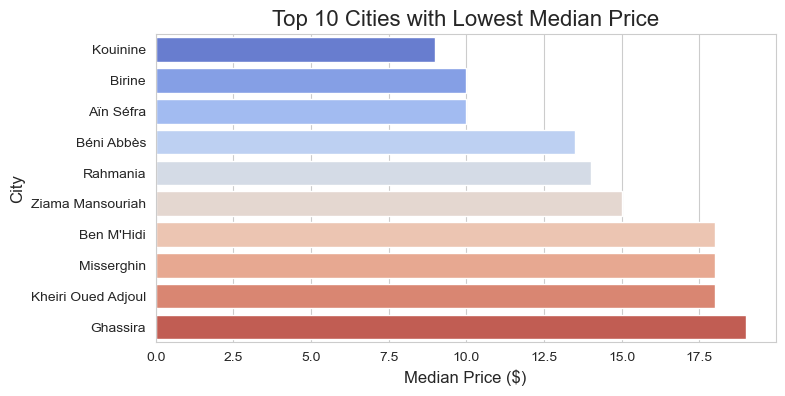

In [52]:
# 2. Price Analysis by City and Province (Top 10 cities/provinces by average price)
top_cities_by_price = df.groupby('City')['Price'].median().sort_values(ascending=True).head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_cities_by_price.values, y=top_cities_by_price.index, palette='coolwarm')
plt.title('Top 10 Cities with Lowest Median Price', fontsize=16)
plt.xlabel('Median Price ($)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

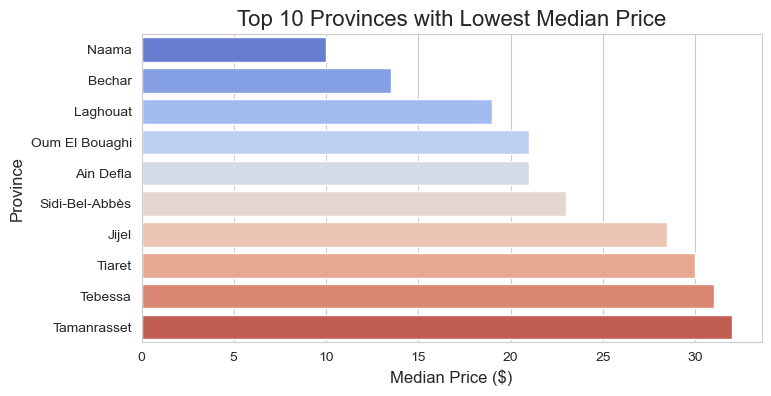

In [54]:
top_provinces_by_price = df.groupby('Province')['Price'].median().sort_values(ascending=True).head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_provinces_by_price.values, y=top_provinces_by_price.index, palette='coolwarm')
plt.title('Top 10 Provinces with Lowest Median Price', fontsize=16)
plt.xlabel('Median Price ($)', fontsize=12)
plt.ylabel('Province', fontsize=12)
plt.show()

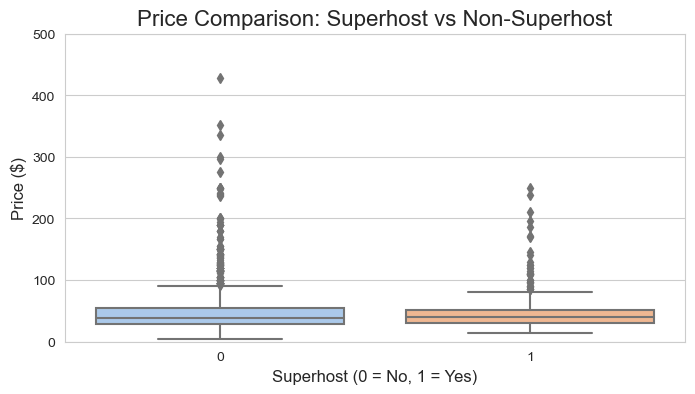

In [56]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='superhost', y='Price', data=df, palette='pastel')
plt.title('Price Comparison: Superhost vs Non-Superhost', fontsize=16)
plt.xlabel('Superhost (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.ylim(0, 500) 
plt.show()

* Superhosts appear to have a wider range of prices, but they may charge slightly higher prices on average compared to non-superhosts.

## Correlation Analysis

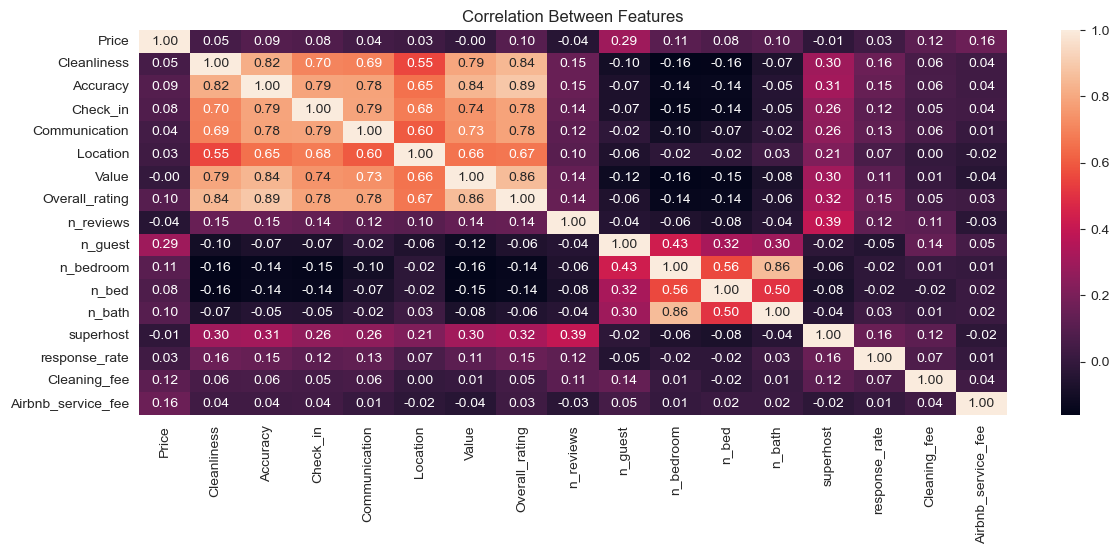

In [60]:
numeric_cols = ['Price','Cleanliness','Accuracy','Check_in','Communication','Location',	'Value','Overall_rating','n_reviews', 'n_guest', 'n_bedroom', 'n_bed','n_bath','superhost','response_rate', 'Cleaning_fee', 'Airbnb_service_fee']
data = df[numeric_cols]

# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Between Features")
plt.show()

**General Insights:**

* The overall rating is significantly influenced by features like cleanliness, accuracy, and value.
* Price is driven by practical factors like the number of guests and the service fee, with weaker links to subjective metrics like ratings.
* Service fees are closely tied to price and the number of guests.
* Properties managed by superhosts perform slightly better across ratings and cleanliness.

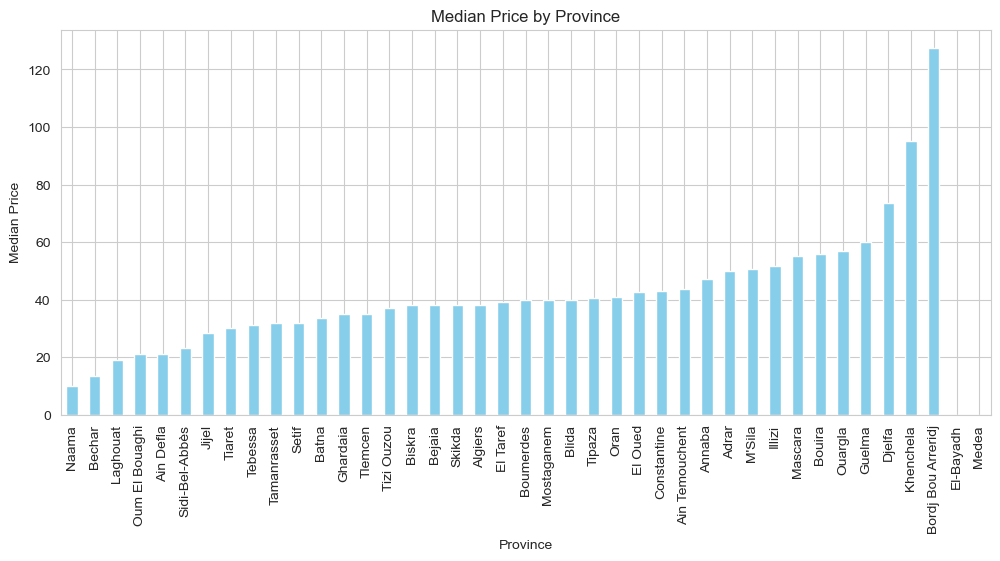

In [62]:
avg_price_by_location = df.groupby('Province')['Price'].median().sort_values()

# Plot bar chart
plt.figure(figsize=(12, 5))
avg_price_by_location.plot(kind='bar', color='skyblue', grid=True)
plt.title("Median Price by Province")
plt.xlabel("Province")
plt.ylabel("Median Price")
plt.xticks(rotation=90)
plt.show()

In [64]:

data = df[['Overall_rating', 'n_reviews', 'n_guest', 
           'n_bedroom', 'n_bed', 'superhost', 'Price', 'host_experience']].dropna(subset=['Price'])
X = data.drop(columns='Price')
y = data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.02, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1  
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,  
    'Importance': best_model.feature_importances_
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

feature_importances_df

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Test MSE: 1470.2201803947557


,Feature,Importance
2,n_guest,0.281832
3,n_bedroom,0.177494
4,n_bed,0.129926
6,host_experience,0.124394
0,Overall_rating,0.106986
1,n_reviews,0.094157
5,superhost,0.085210


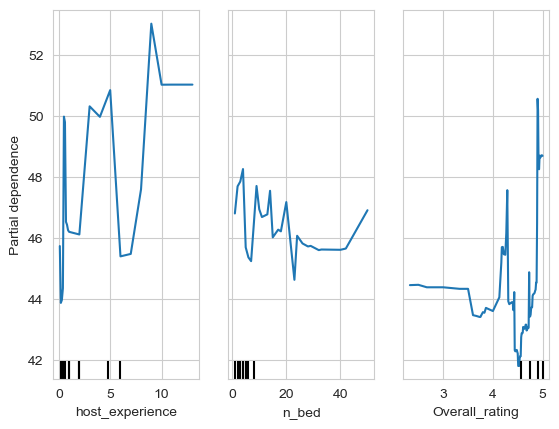

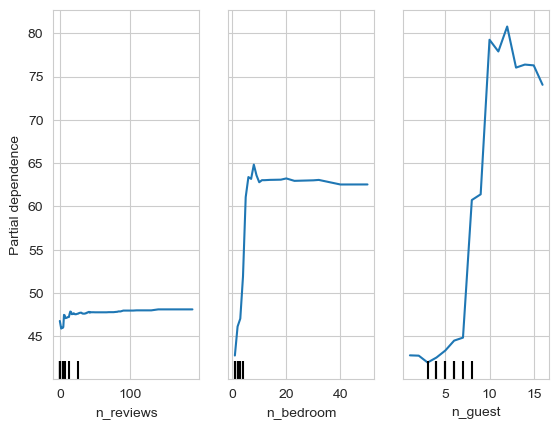

In [66]:
PartialDependenceDisplay.from_estimator(best_model, X_train, features=[6, 4, 0], feature_names=X_train.columns)
plt.show()

PartialDependenceDisplay.from_estimator(best_model, X_train, features=[1, 3, 2], feature_names=X_train.columns)
plt.show()

# Fees Analysis

In [68]:
data = df[['Price', 'Cleaning_fee', 'Airbnb_service_fee', 'n_reviews', 'Overall_rating']].dropna()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,950.0,46.092632,29.189867,9.00,30.0,39.0,51.75,250.0
Cleaning_fee,950.0,6.394737,10.876884,0.00,0.0,0.0,10.00,100.0
Airbnb_service_fee,950.0,37.093684,27.088324,0.00,23.0,32.0,44.00,225.0
n_reviews,950.0,18.262105,21.579362,3.00,5.0,11.0,22.00,190.0
Overall_rating,950.0,4.705105,0.363287,2.33,4.6,4.8,4.99,5.0


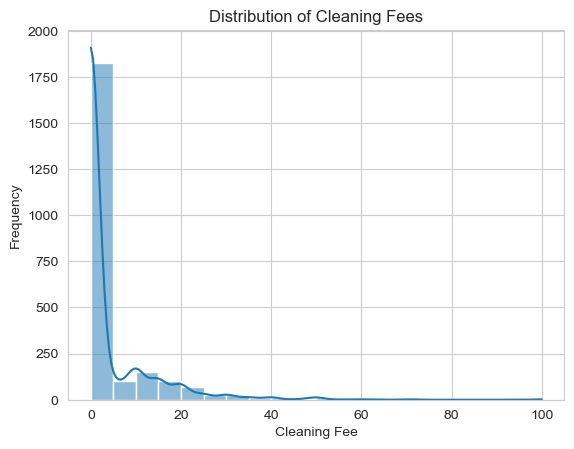

In [72]:
sns.histplot(df['Cleaning_fee'], kde=True, bins=20)
plt.title("Distribution of Cleaning Fees")
plt.xlabel("Cleaning Fee")
plt.ylabel("Frequency")
plt.show()

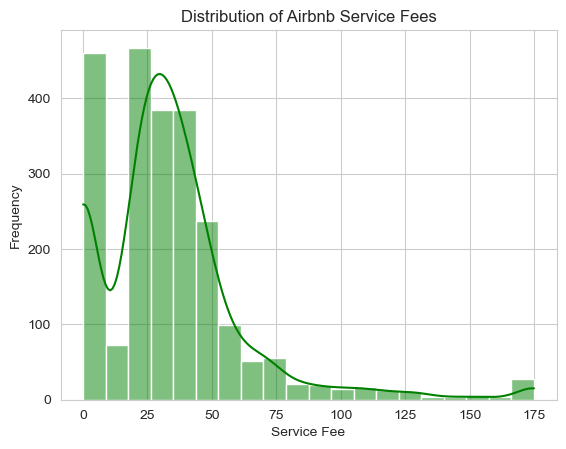

In [74]:
upper_limit = df['Airbnb_service_fee'].quantile(0.99)
Airbnb_service_fee = np.where(df['Airbnb_service_fee'] > upper_limit, upper_limit, df['Airbnb_service_fee'])

sns.histplot(Airbnb_service_fee, kde=True, color='green', bins=20)
plt.title("Distribution of Airbnb Service Fees")
plt.xlabel("Service Fee")
plt.ylabel("Frequency")
plt.show()

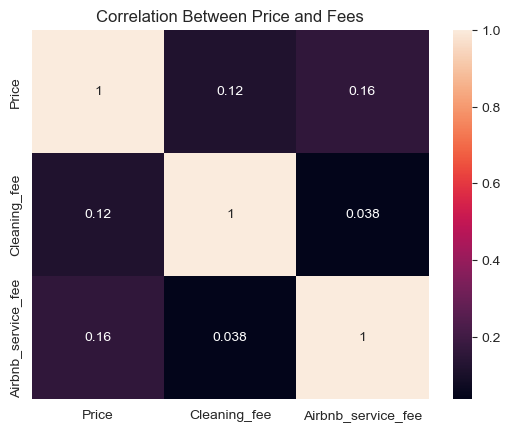

In [76]:
correlation = df[['Price', 'Cleaning_fee', 'Airbnb_service_fee']].corr()

sns.heatmap(correlation, annot=True)
plt.title("Correlation Between Price and Fees")
plt.show()

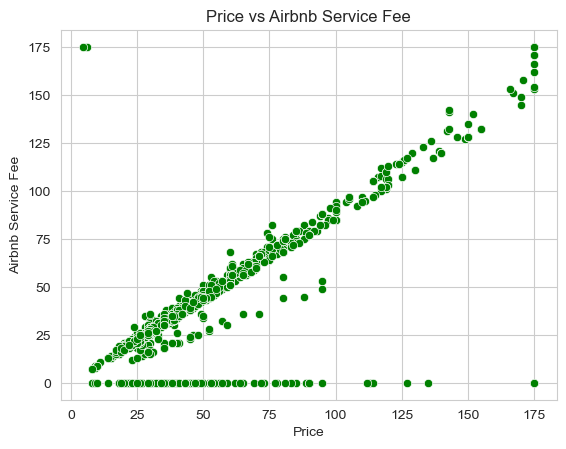

In [78]:
upper_limit_price = df['Price'].quantile(0.99)
Price = np.where(df['Price'] > upper_limit, upper_limit, df['Price'])

upper_limit_service_fee = df['Airbnb_service_fee'].quantile(0.99)
Airbnb_service_fee = np.where(df['Airbnb_service_fee'] > upper_limit_service_fee, upper_limit_service_fee, df['Airbnb_service_fee'])

sns.scatterplot(x=Price, y=Airbnb_service_fee, color='green')
plt.title("Price vs Airbnb Service Fee")
plt.xlabel("Price")
plt.ylabel("Airbnb Service Fee")
plt.show()

**Overall Insights:**

**Key Relationships:**
  
* Service fees are directly proportional to the price of the listing.

* Cleaning fees do not depend on the price or service fees, suggesting independent pricing.

**Potential Pricing Model:**

* The strong linear relationship suggests a formula-based calculation for service fees based on the price.

# Overall Rating Analysis

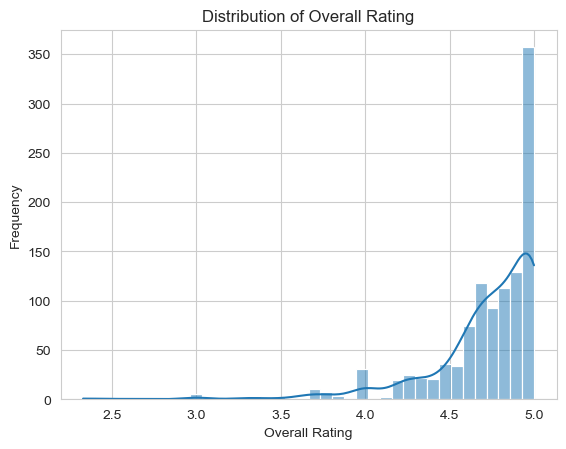

In [80]:
sns.histplot(df['Overall_rating'], kde=True)
plt.title("Distribution of Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.show()

# Review Sentiments

In [82]:
nltk.download('stopwords')
nltk.download('wordnet')

# Text Preprocessing function
def preprocess_text(text):
    
    if not isinstance(text, str):
        return ""
        
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)

    words = text.split()

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

df['cleaned_review'] = df['Comments'].dropna().apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ryma-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ryma-\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [84]:
def preprocess_text(text):
    if pd.isna(text):
        return np.nan

    comments = text.split('****')
    
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    processed_comments = []
    for comment in comments:
        comment = comment.lower()
        comment = re.sub(r'[^a-z\s]', '', comment)
        words = comment.split()
        words = [word for word in words if word not in stop_words]
        words = [lemmatizer.lemmatize(word) for word in words]

        processed_comments.append(' '.join(words))

    return '  '.join(processed_comments)

# Example usage
df['cleaned_review'] = df['Comments'].apply(preprocess_text)


In [86]:
nltk.download('vader_lexicon')
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

df['sentiment_score'] = df['cleaned_review'].dropna().apply(get_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ryma-\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [88]:
def categorize_sentiment(score):
    if score >= 0.5:
        return 'positive'
    elif 0 <= score < 0.5:
        return 'neutral'
    elif score < 0:
        return 'negative'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

In [90]:
df['sentiment_category'].value_counts()

sentiment_category
positive    1107
negative       2
neutral        1
Name: count, dtype: int64

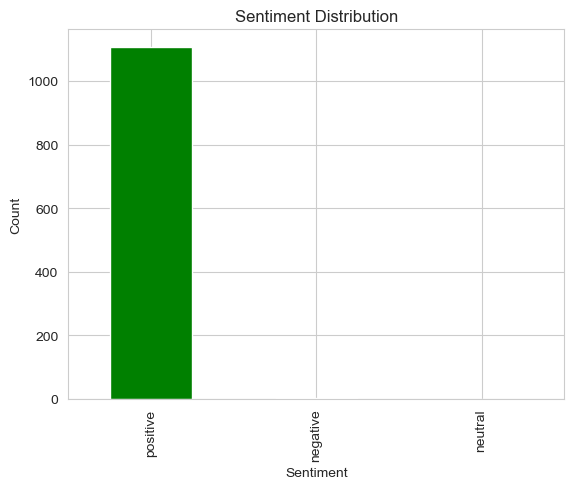

In [92]:
sentiment_counts = df['sentiment_category'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

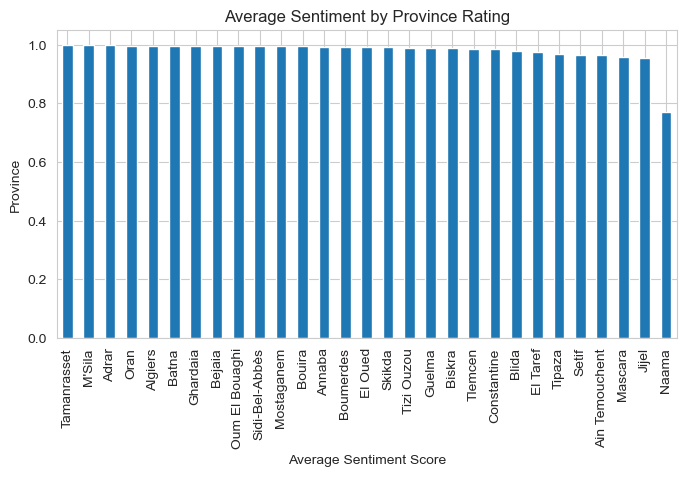

In [96]:
plt.figure(figsize=(8, 4))
df.groupby('Province')['sentiment_score'].mean().sort_values(ascending=False).dropna().plot(kind='bar')
plt.title("Average Sentiment by Province Rating")
plt.xlabel('Average Sentiment Score')
plt.ylabel('Province')
plt.show()

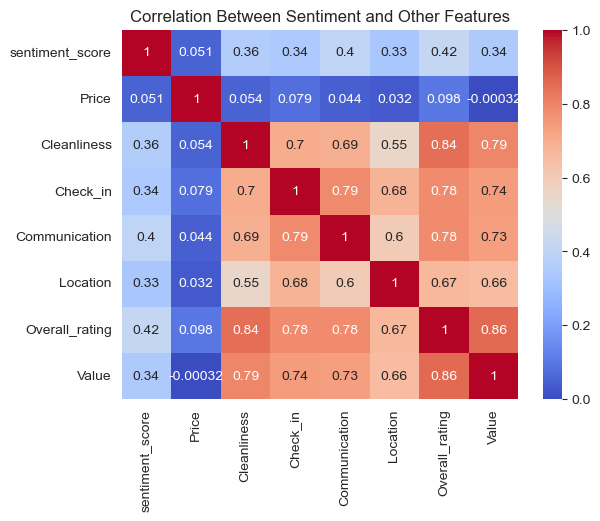

In [98]:
correlation_matrix = df[['sentiment_score', 'Price', 'Cleanliness', 'Check_in', 'Communication', 'Location', 'Overall_rating', 'Value']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Sentiment and Other Features")
plt.show()

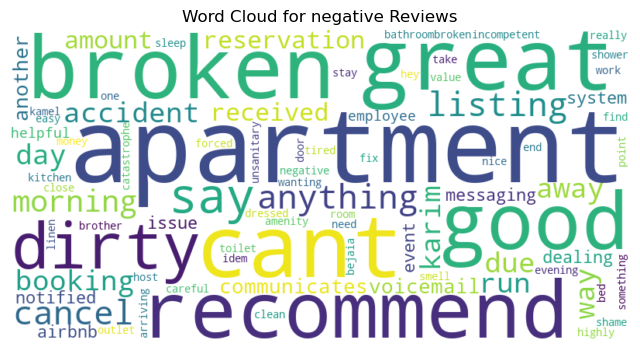

In [372]:
plt.figure(figsize=(8, 6))
positive_reviews = df[df['sentiment_category'] == 'negative']['cleaned_review']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for negative Reviews")
plt.axis('off')
plt.show()


**Prominent Words:**

* Words like "broken," "apartment," "great," "can't," and "dirty" appear most frequently. These likely represent common complaints or recurring themes in the reviews.
  
**Themes in Complaints:**

* "Broken": Suggests issues with malfunctioning amenities or items in the listings.
* "Dirty": Indicates concerns about cleanliness and hygiene.
* "Can't": Could highlight frustrations or limitations experienced by users.
* "Apartment": This might be the primary focus of the reviews, possibly tied to expectations versus reality.
* "Great": Interestingly, this positive word appears in a negative context, possibly as sarcasm or mixed reviews.

**Other Issues:**

Words like "recommend," "cancel," "morning," "day," and "accident" suggest broader concerns about customer service, booking cancellations, or specific negative events during the stay.

**Actionable Insights:**

* **Maintenance Issues:** Address reported broken amenities or items in properties.
* **Cleanliness Standards:** Improve hygiene protocols.
* **Communication:** Words like "say," "messaging," and "communicates" indicate potential gaps in host-guest communication.

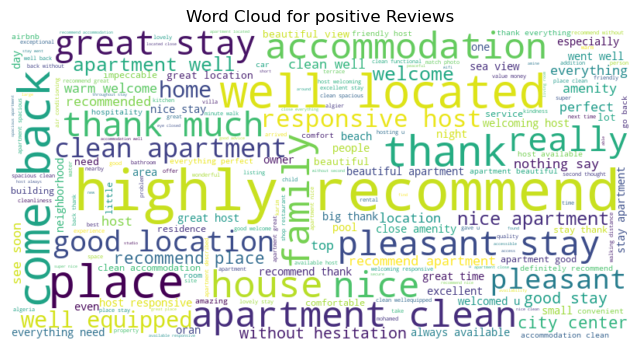

In [268]:
plt.figure(figsize=(8, 6))
positive_reviews = df[df['sentiment_category'] == 'positive']['cleaned_review']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for positive Reviews")
plt.axis('off')
plt.show()

**Prominent Words:**

Words like "highly recommend," "well located," "clean," "pleasant," "accommodation," and "thank" appear frequently, indicating the main positive attributes praised by users.

**Positive Themes:**

* "Highly recommend": Indicates strong overall satisfaction and willingness to endorse the property.
* "Well located": Suggests that the location of the properties is a major advantage.
* "Clean" and "well equipped": Highlight appreciation for cleanliness and functional amenities.
* "Pleasant stay" and "great stay": Point to enjoyable experiences during their visits.
  
**Host and Service:**

Words like "responsive host," "thank," and "welcome" suggest satisfaction with the hosts' hospitality and responsiveness.

**Other Positive Attributes:**

* Terms like "family," "house," and "apartment" might indicate that the properties are suitable for families or groups.
* Words like "good location," "nice apartment," and "comfortable" reinforce the positive aspects of the accommodations.

**Actionable Insights:**

* **Location:** Emphasize the convenience of the location in marketing materials.
* **Cleanliness** and Amenities: Maintain high standards in cleanliness and provide necessary amenities to meet guest expectations.
* **Host-Guest Interaction:** Continue fostering good communication and responsiveness.

# Amenity Importance

In [104]:
df['amenities'] = df['renamed_amenities'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
high_rated = df[df['Overall_rating'] >= 4.7]

from collections import Counter

# Flatten the list of amenities
amenities_list = high_rated['amenities'].explode()

# Count the frequency of each amenity
amenity_counts = Counter(amenities_list)

# Convert to DataFrame for analysis
amenity_counts_df = pd.DataFrame(amenity_counts.items(), columns=['Amenity', 'Count']).sort_values(by='Count', ascending=False)

In [106]:
amenity_counts_df

,Amenity,Count
8,Family Kitchen & Outdoor Dining,720
7,Comfort Features & Bathing,709
4,Entertainment,696
5,Parking Facilities,687
16,Laundry Services & Equipment,650
19,WiFi,567
2,Fridges & Cooling Devices,553
11,TVs,528
14,Cooktops & Ovens,510
0,Coffee Makers,501


In [108]:
low_rated = df[df['Overall_rating'] < 4.7]
low_amenities_list = low_rated['renamed_amenities'].explode()
low_amenity_counts = Counter(low_amenities_list)
low_amenity_counts_df = pd.DataFrame(low_amenity_counts.items(), columns=['Amenity', 'Count']).sort_values(by='Count', ascending=False)

In [110]:
low_amenity_counts_df

,Amenity,Count
9,Family Kitchen & Outdoor Dining,380
6,Comfort Features & Bathing,378
0,Entertainment,362
4,Parking Facilities,358
8,Laundry Services & Equipment,300
1,TVs,289
14,WiFi,265
12,Fridges & Cooling Devices,263
7,Cooktops & Ovens,213
3,Coffee Makers,192


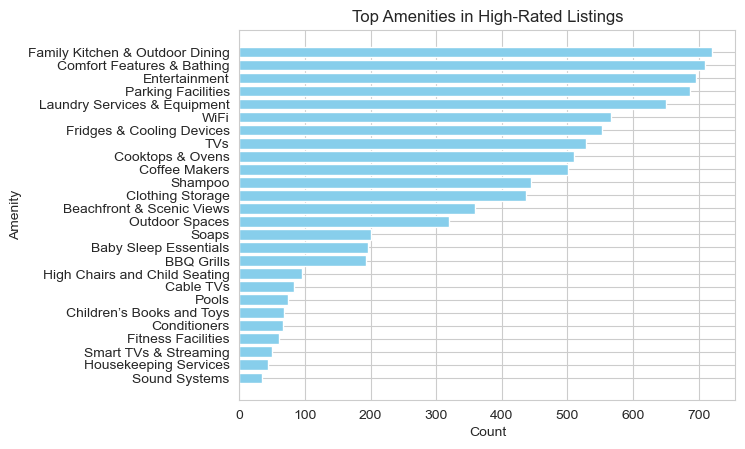

In [112]:
top_amenities = amenity_counts_df
plt.barh(top_amenities['Amenity'], top_amenities['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Amenity')
plt.title('Top Amenities in High-Rated Listings')
plt.gca().invert_yaxis()
plt.show()

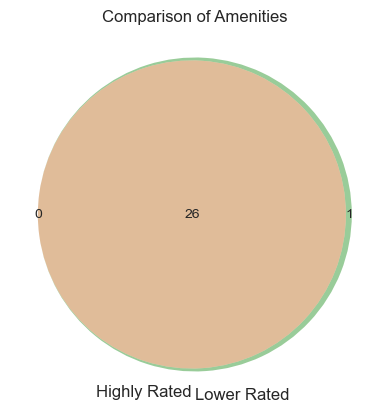

In [114]:
high_rated_amenities = set(amenity_counts_df['Amenity'])
low_rated_amenities = set(low_amenity_counts_df['Amenity'])

venn2([high_rated_amenities, low_rated_amenities], ('Highly Rated', 'Lower Rated'))
plt.title('Comparison of Amenities')
plt.show()


# Overall Rating Analysis

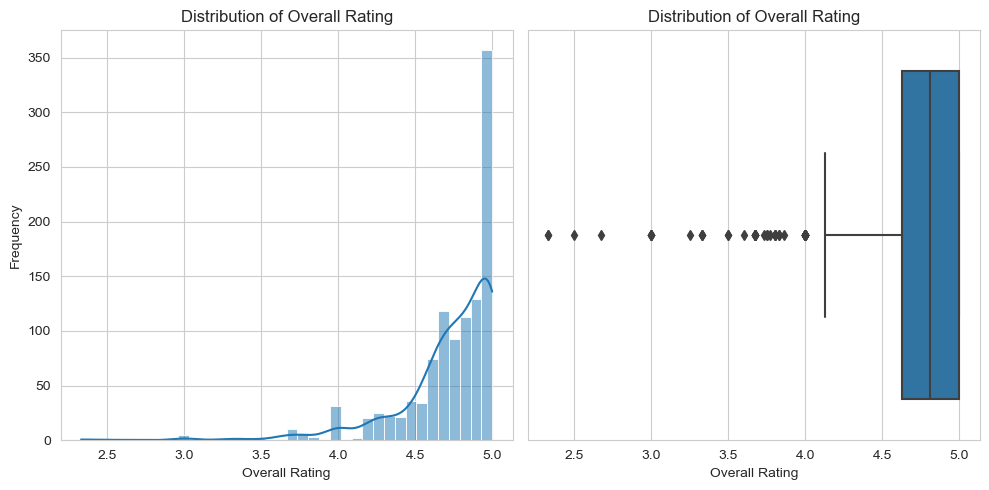

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

sns.histplot(df['Overall_rating'], kde=True, ax=axes[0])
axes[0].set_title("Distribution of Overall Rating")
axes[0].set_xlabel("Overall Rating")
axes[0].set_ylabel("Frequency")

sns.boxplot(x=df['Overall_rating'], ax=axes[1]) 
axes[1].set_title("Distribution of Overall Rating")
axes[1].set_xlabel("Overall Rating")

# Display the plots
plt.tight_layout()
plt.show()

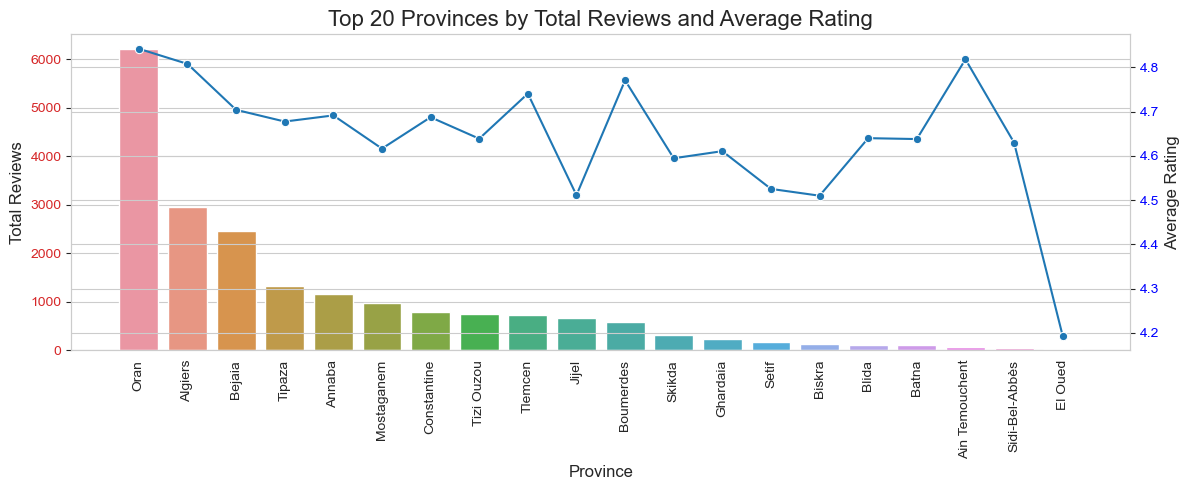

In [122]:
top_provinces_by_rating = df.groupby('Province').agg(
    avg_rating=('Overall_rating', 'mean'),
    total_reviews=('n_reviews', 'sum')
).sort_values(by='total_reviews', ascending=False).head(20).reset_index()

# Create a twin-axis plot
fig, ax1 = plt.subplots(figsize=(12, 5))

# Bar plot for total reviews
sns.barplot(
    x=top_provinces_by_rating['Province'],
    y=top_provinces_by_rating['total_reviews'],
    ax=ax1
)
ax1.set_ylabel('Total Reviews', fontsize=12)
ax1.set_title('Top 20 Provinces by Total Reviews and Average Rating', fontsize=16)
ax1.set_xlabel('Province', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:red')

# Rotate x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Line plot for average rating
ax2 = ax1.twinx()
sns.lineplot(
    x=top_provinces_by_rating['Province'],
    y=top_provinces_by_rating['avg_rating'],
    marker='o',
    ax=ax2
)
ax2.set_ylabel('Average Rating', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# Adjust layout and show plot
fig.tight_layout()
plt.show()


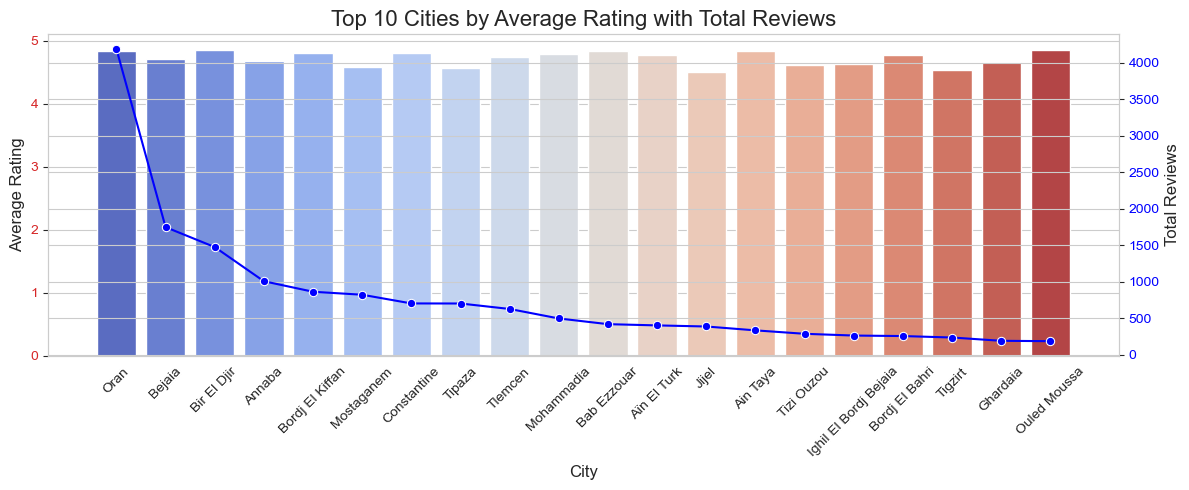

In [124]:
top_provinces_by_rating = df.groupby('City').agg(
    avg_rating=('Overall_rating', 'mean'),
    total_reviews=('n_reviews', 'sum')
).sort_values(by='total_reviews', ascending=False).head(20)

# Create a twin-axis plot
fig, ax1 = plt.subplots(figsize=(12, 5))

# Bar plot for average rating
sns.barplot(
    x=top_provinces_by_rating.index,
    y=top_provinces_by_rating['avg_rating'],
    palette='coolwarm',
    ax=ax1
)
ax1.set_ylabel('Average Rating', fontsize=12)
ax1.set_title('Top 10 Cities by Average Rating with Total Reviews', fontsize=16)
ax1.set_xlabel('City', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Line plot for total reviews
ax2 = ax1.twinx()
sns.lineplot(
    x=top_provinces_by_rating.index,
    y=top_provinces_by_rating['total_reviews'],
    marker='o',
    color='blue',
    ax=ax2
)
ax2.set_ylabel('Total Reviews', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')


fig.tight_layout()
plt.show()


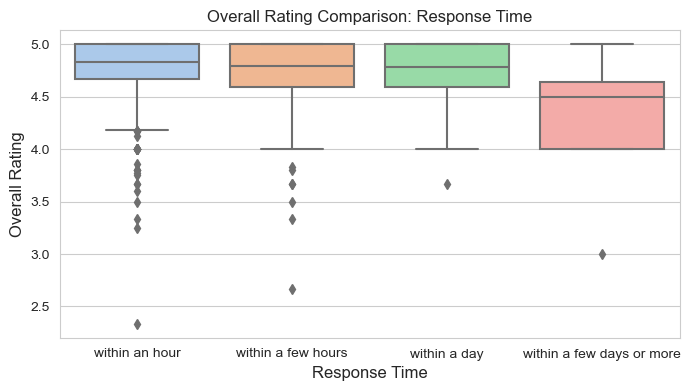

In [126]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='response_time', y='Overall_rating', data=df, palette='pastel')
plt.title('Overall Rating Comparison: Response Time')
plt.xlabel('Response Time', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
#plt.ylim(0, 5)  
plt.show()

**Observations:**

* Listings with faster response times ("within a few hours" or "within an hour") tend to have higher ratings (median close to 5).
* Ratings decrease for slower response times, with the lowest median for hosts responding "within a few days or more."
* Variability in ratings increases as response time slows, with more outliers appearing in slower response categories.

**Insights:**

* Faster response times are positively correlated with higher ratings, suggesting that responsiveness plays a key role in guest satisfaction.

In [128]:
f_stat, p_value = f_oneway(
    df[df['response_time'] == 'within a few hours']['Overall_rating'].dropna(),
    df[df['response_time'] == 'within an hour']['Overall_rating'].dropna(),
    df[df['response_time'] == 'within a day']['Overall_rating'].dropna(),
    df[df['response_time'] == 'within a few days or more']['Overall_rating'].dropna())

print(f"ANOVA result : F={f_stat}, p={p_value}")

ANOVA result : F=8.319295960079698, p=1.8252403884694597e-05


In [130]:
data = df.dropna(subset=['Overall_rating', 'response_time'])
model = ols('Overall_rating ~ response_time', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

tukey = pairwise_tukeyhsd(data['Overall_rating'], data['response_time'], alpha=0.05)

print(tukey.summary())


                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                    group2          meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------
             within a day within a few days or more  -0.4767 0.0042 -0.8395 -0.1139   True
             within a day        within a few hours  -0.0264  0.937 -0.1426  0.0899  False
             within a day            within an hour   0.0576 0.4522 -0.0428   0.158  False
within a few days or more        within a few hours   0.4503 0.0064  0.0946  0.8061   True
within a few days or more            within an hour   0.5343 0.0006  0.1834  0.8852   True
       within a few hours            within an hour    0.084 0.0131  0.0128  0.1551   True
------------------------------------------------------------------------------------------


There are significant differences in overall ratings between several pairs of groups (e.g., "within a day" vs "within a few days or more," "within a few days or more" vs "within a few hours," etc.).

However, the differences between "within a day" and the other categories ("within a few hours" and "within an hour") are not statistically significant.

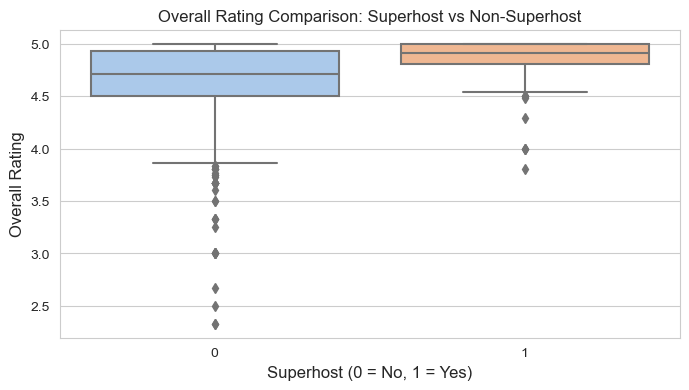

In [132]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='superhost', y='Overall_rating', data=df, palette='pastel')
plt.title('Overall Rating Comparison: Superhost vs Non-Superhost')
plt.xlabel('Superhost (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
#plt.ylim(0, 5) 
plt.show()

**Observations:**

* Superhosts (1) tend to have slightly higher overall ratings than non-Superhosts (0).
* The median rating for Superhosts is closer to the maximum (5), while non-Superhosts exhibit slightly lower medians.
* Superhosts also have a narrower interquartile range (IQR), indicating less variability in their ratings.
* Outliers (ratings below 4) are more frequent among non-Superhosts.

**Insights:**

* Being a Superhost is associated with higher and more consistent ratings, likely reflecting better service or guest experience.

**Median Ratings:**

Both newer and experienced hosts generally have high overall ratings, but experienced hosts appear to have slightly higher median ratings.

**Interquartile Range (IQR):**

The IQR for newer hosts is broader than that for experienced hosts, indicating more variability in the ratings of newer hosts.
Experienced hosts' ratings are tightly clustered near the top end, reflecting consistency in performance.

**Implications:**

* Superhosts might deliver more consistent and higher-quality services compared to newer hosts, potentially due to their familiarity with guest expectations and platform best practices.

* Non Superhhosts should focus on improving consistency to reduce the number of outliers and achieve better guest satisfaction.

**Implications:**
  
* **For Non-Superhosts:** Improving service quality and addressing common guest complaints could help reduce the variability in ratings and increase the chances of attaining Superhost status.
* **For Airbnb Guests:** Choosing Superhosts may be a safer option for consistent and high-quality stays.

In [135]:
superhost_ratings = df[df['superhost'] == 1]['Overall_rating'].dropna()
non_superhost_ratings = df[df['superhost'] == 0]['Overall_rating'].dropna()

t_stat, p_value = ttest_ind(superhost_ratings, non_superhost_ratings, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 14.217828492986879, P-Value: 4.749713854195706e-42


**Significant Difference:** The ratings of experienced hosts (e.g., superhosts) are statistically significantly different from those of newer hosts.

**Practical Implication:** Experienced hosts likely have higher overall ratings than newer ones

# Total Reviews Analysis

In [165]:
import xgboost as xgb 

data = df[['Cleanliness', 'Communication', 'Location', 'Accuracy', 'Check_in',
           'Value', 'Overall_rating', 'n_reviews', 'n_guest', 'superhost', 'Price', 'host_experience']]

X = data.drop(columns='n_reviews')
y = data['n_reviews']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.02, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,  
    verbose=2,
    n_jobs=-1 
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': best_model.feature_importances_
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

feature_importances_df

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
Test MSE: 100.77020441026498


,Feature,Importance
6,Overall_rating,0.246219
5,Value,0.159395
8,superhost,0.144668
10,host_experience,0.090853
3,Accuracy,0.084505
0,Cleanliness,0.065634
1,Communication,0.046099
4,Check_in,0.046075
9,Price,0.045999
7,n_guest,0.042764


* Overall Rating (importance: 0.24) is the most influential factor.
* Value (importance: 0.16) plays a significant role.
* Superhost (importance: 0.14) also impacts reviews notably.
* Factors like communication, value, and accuracy are moderately important, while location and cleanliness have lower impacts.

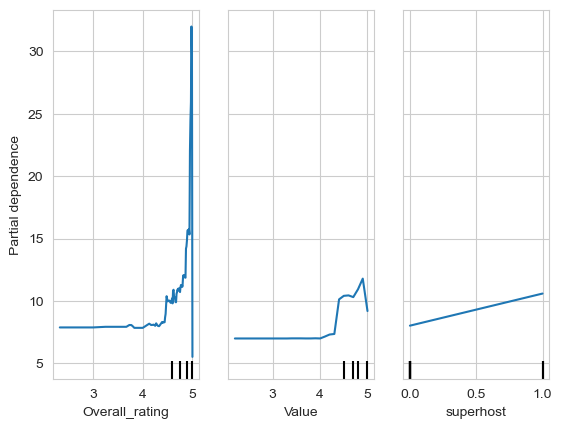

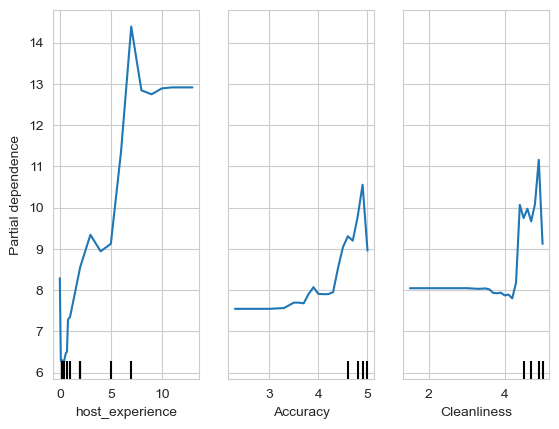

In [152]:
PartialDependenceDisplay.from_estimator(best_model, X_train, features=[6, 5, 8], feature_names=X_train.columns)
plt.show()

PartialDependenceDisplay.from_estimator(best_model, X_train, features=[10, 3, 0], feature_names=X_train.columns)
plt.show()

* Communication, Value, and Accuracy: A sharp increase in reviews is observed when ratings approach the highest scores.
* Superhost: Listings from superhosts (value = 1) tend to receive more reviews.
* Overall Rating: A clear rise in reviews occurs when overall ratings are close to 5.
* Host Experience: Hosts with more experience (e.g., 10+ years) see a notable increase in the number of reviews.

**Insights:**
* Superhost Status: Listings hosted by superhosts receive significantly more reviews, suggesting that credibility and trust encourage guest feedback.
* High Ratings (Overall, Value, Accuracy): Listings with near-perfect ratings are likely to have more reviews. This might indicate a positive feedback loop, where good ratings attract more guests, who then leave reviews.
* Host Experience: Experienced hosts seem to attract more reviews, possibly due to better service or more established practices.

# Overall Rating VS Sub-Rating Analysis

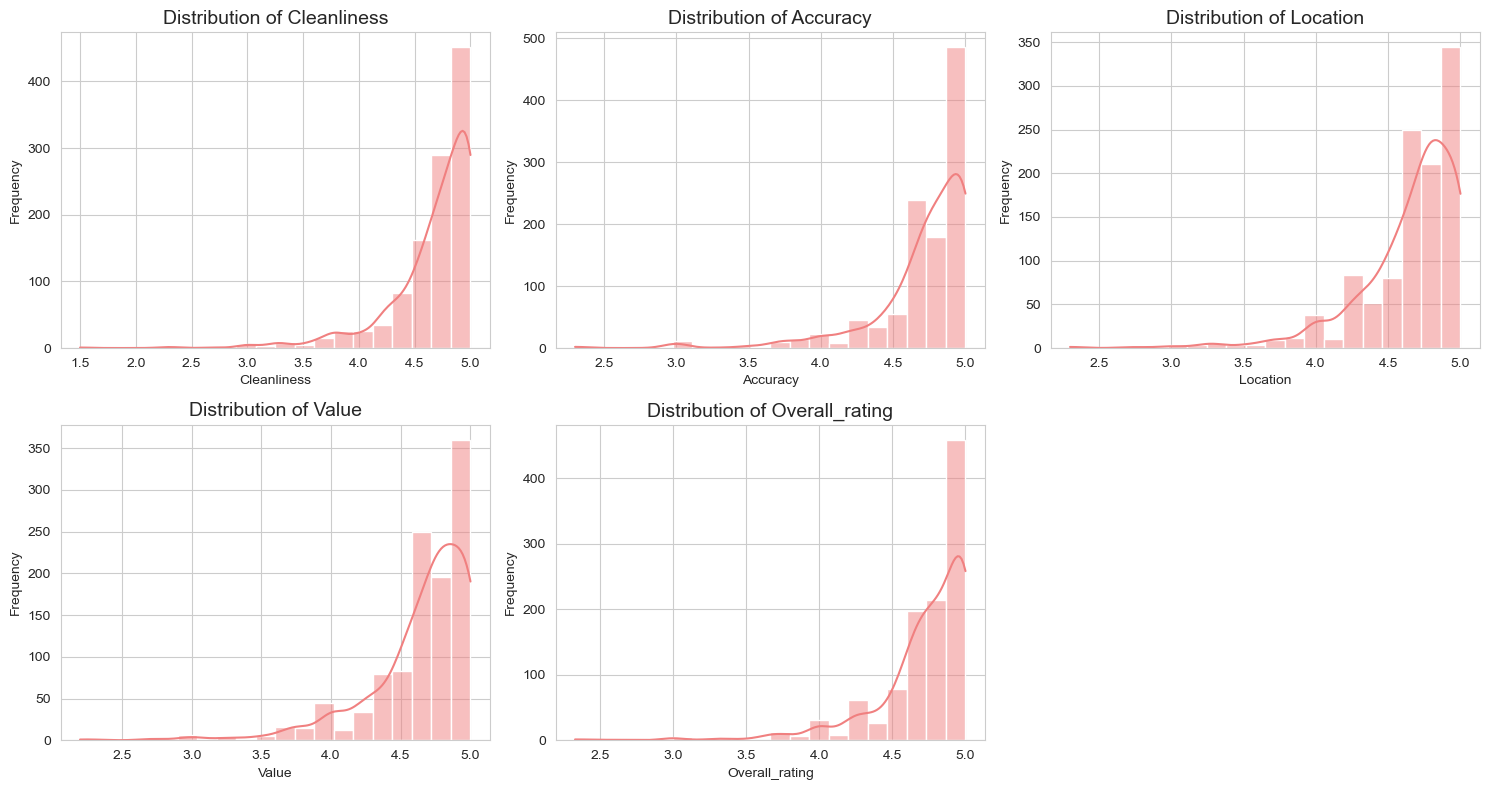

In [157]:
review_columns = ['Cleanliness', 'Accuracy', 'Location', 'Value', 'Overall_rating']
plt.figure(figsize=(15, 8))
for i, col in enumerate(review_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), bins=20, kde=True, color='lightcoral')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()

* Each of the review categories (Cleanliness, Accuracy, Location, Value, and Overall Rating) follows a pattern where most scores are clustered near the higher end (e.g., 4-5).
* This indicates generally positive reviews for these aspects.

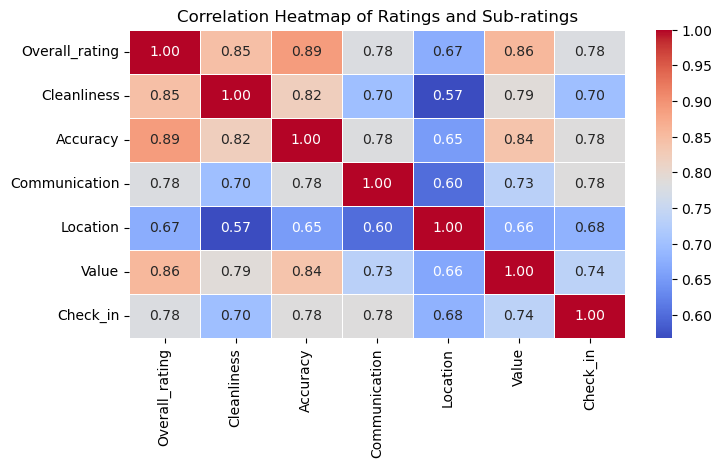

In [130]:
correlation_matrix = df[['Overall_rating', 'Cleanliness', 'Accuracy', 'Communication', 'Location', 'Value', 'Check_in']].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Ratings and Sub-ratings")
plt.show()


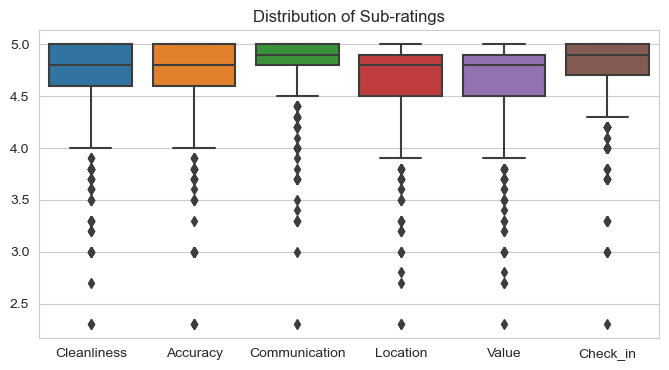

In [82]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['Cleanliness', 'Accuracy', 'Communication', 'Location', 'Value', 'Check_in']])
plt.title("Distribution of Sub-ratings")
plt.show()


In [166]:
import xgboost as xgb 

data = df[['Cleanliness', 'Communication', 'Location', 'Accuracy', 'Check_in',
           'Value', 'Overall_rating', 'n_reviews', 'superhost', 'Price', 'host_experience']].dropna()

X = data.drop(columns='Overall_rating')
y = data['Overall_rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.02, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available CPUs
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,  # Replace X_train.columns with the list of feature names if not a DataFrame
    'Importance': best_model.feature_importances_
})

# Sort the DataFrame by importance values in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

feature_importances_df



Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Test MSE: 0.013798335076724446


,Feature,Importance
3,Accuracy,0.415066
5,Value,0.240873
0,Cleanliness,0.126403
1,Communication,0.100817
4,Check_in,0.045441
2,Location,0.023081
7,superhost,0.020162
8,Price,0.011038
6,n_reviews,0.009480
9,host_experience,0.007639


**Accuracy (41%)** is by far the most influential feature, reflecting its substantial impact on guests’ perception of their stay.

**Value (24%)** and **Cleanliness (12.6%)** are nearly equally important, emphasizing the need for hosts to ensure competitive pricing and maintain high hygiene standards.

Other factors like **Communication (10%), Location (2%), and Check-in (4%)** are moderately important but not as critical as the top three features.

Features such as **Price, Superhost status, Number of reviews, and Host experience** have much smaller importance values, indicating a minor influence on the overall rating.

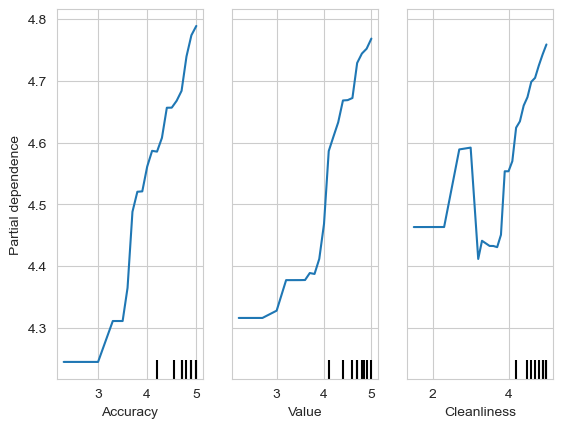

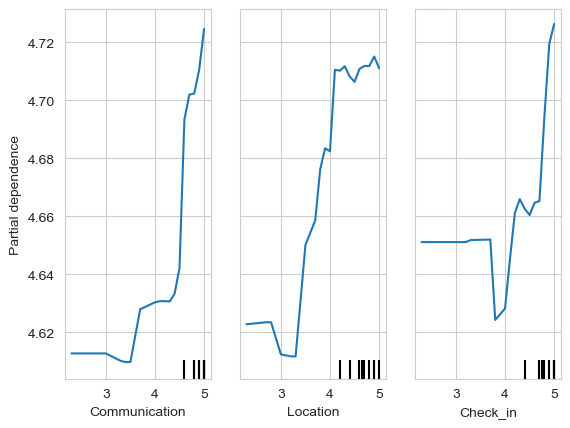

In [167]:
PartialDependenceDisplay.from_estimator(best_model, X_train, features=[3, 5, 0], feature_names=X_train.columns)
plt.show()

PartialDependenceDisplay.from_estimator(best_model, X_train, features=[1, 2, 4], feature_names=X_train.columns)
plt.show()

**Recommendation:**

* **Focus on Accuracy:** Since it has the largest influence, hosts should ensure that listing descriptions, amenities, and photos are highly accurate to manage guest expectations.
* **Improve Value and Cleanliness:** Competitive pricing and spotless accommodations significantly impact overall ratings. Investing in regular cleaning and aligning prices with the market can help.
* **Enhance Communication:** While less critical, clear and prompt communication with guests is still an important factor.
* **Leverage Location:** If applicable, highlight the property's proximity to key attractions or amenities in the listing description.
* **Optimize Check-in Experience:** Simplifying the check-in process (e.g., through smart locks or detailed instructions) can provide an additional boost to ratings.


In [168]:
bins = [0, 3, 4, 4.5, 4.8, 5]
labels = ['Poor (0-3)', 'Average (3-4)', 'Good (4-4.5)', 'Verry Good(4.5-4.8)', 'Excellent (4.8-5)']
df['Rating_Category'] = pd.cut(df['Overall_rating'], bins=bins, labels=labels)

# Count listings in each category
rating_counts = df['Rating_Category'].value_counts()
print(rating_counts)

Rating_Category
Excellent (4.8-5)      560
Verry Good(4.5-4.8)    358
Good (4-4.5)           126
Average (3-4)           58
Poor (0-3)               9
Name: count, dtype: int64


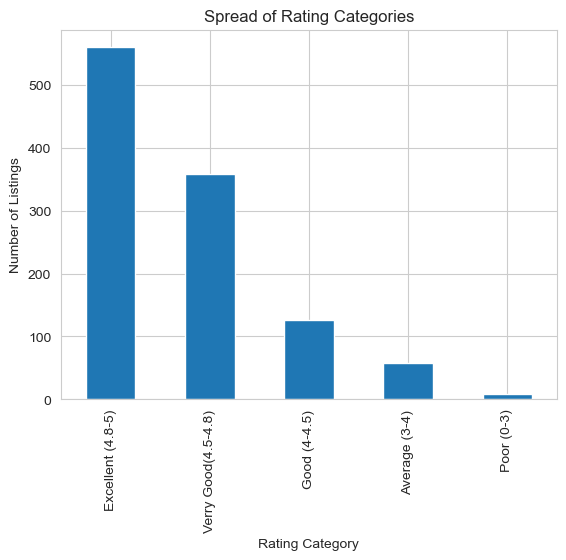

In [169]:
rating_counts.plot(kind='bar')
plt.title('Spread of Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Number of Listings')
plt.show()

# Similar Listings

In [197]:
df1 = df.copy()

# Define numerical and categorical features
numerical_features = ['Price', 'n_reviews', 'Overall_rating', 'n_guest', 'n_bedroom', 'n_bed', 'n_bath']
#categorical_features = ['Province', 'superhost']

# Drop rows where 'Price' is NaN
df1 = df1.dropna(subset=['Price', 'n_bedroom', 'n_bedroom', 'n_bed', 'n_bath'])

# Fill missing values
df1[numerical_features] = df1[numerical_features].fillna(0)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

# Apply preprocessing
X = preprocessor.fit_transform(df1)


C:\Users\Ryma-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryma-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryma-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryma-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

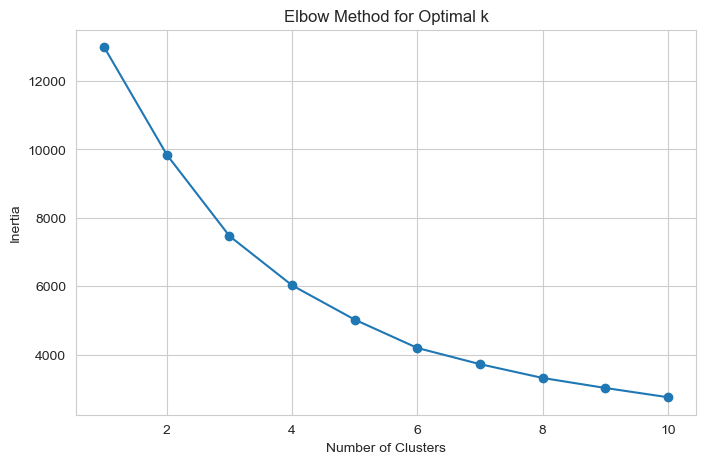

In [199]:

inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


C:\Users\Ryma-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryma-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryma-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryma-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

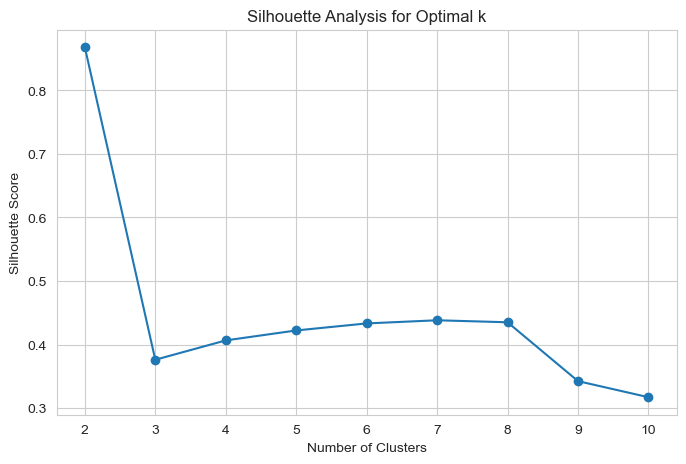

In [201]:
silhouette_scores = []

for k in range_clusters[1:]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range_clusters[1:], silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()


In [203]:
optimal_k = 10  # Based on Elbow or Silhouette analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

df1['Cluster'] = clusters


C:\Users\Ryma-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


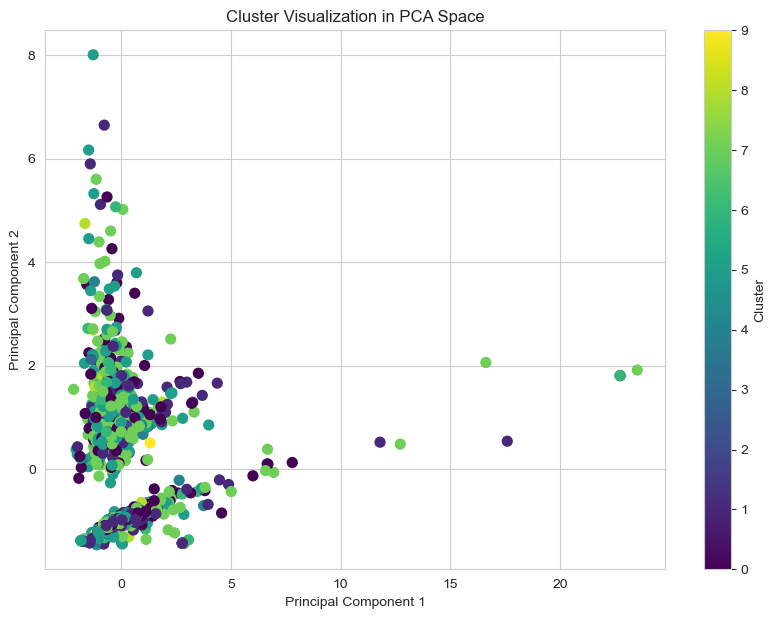

In [189]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df1['Cluster']

# Visualize the clusters in 2D space
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', s=50)
plt.title('Cluster Visualization in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

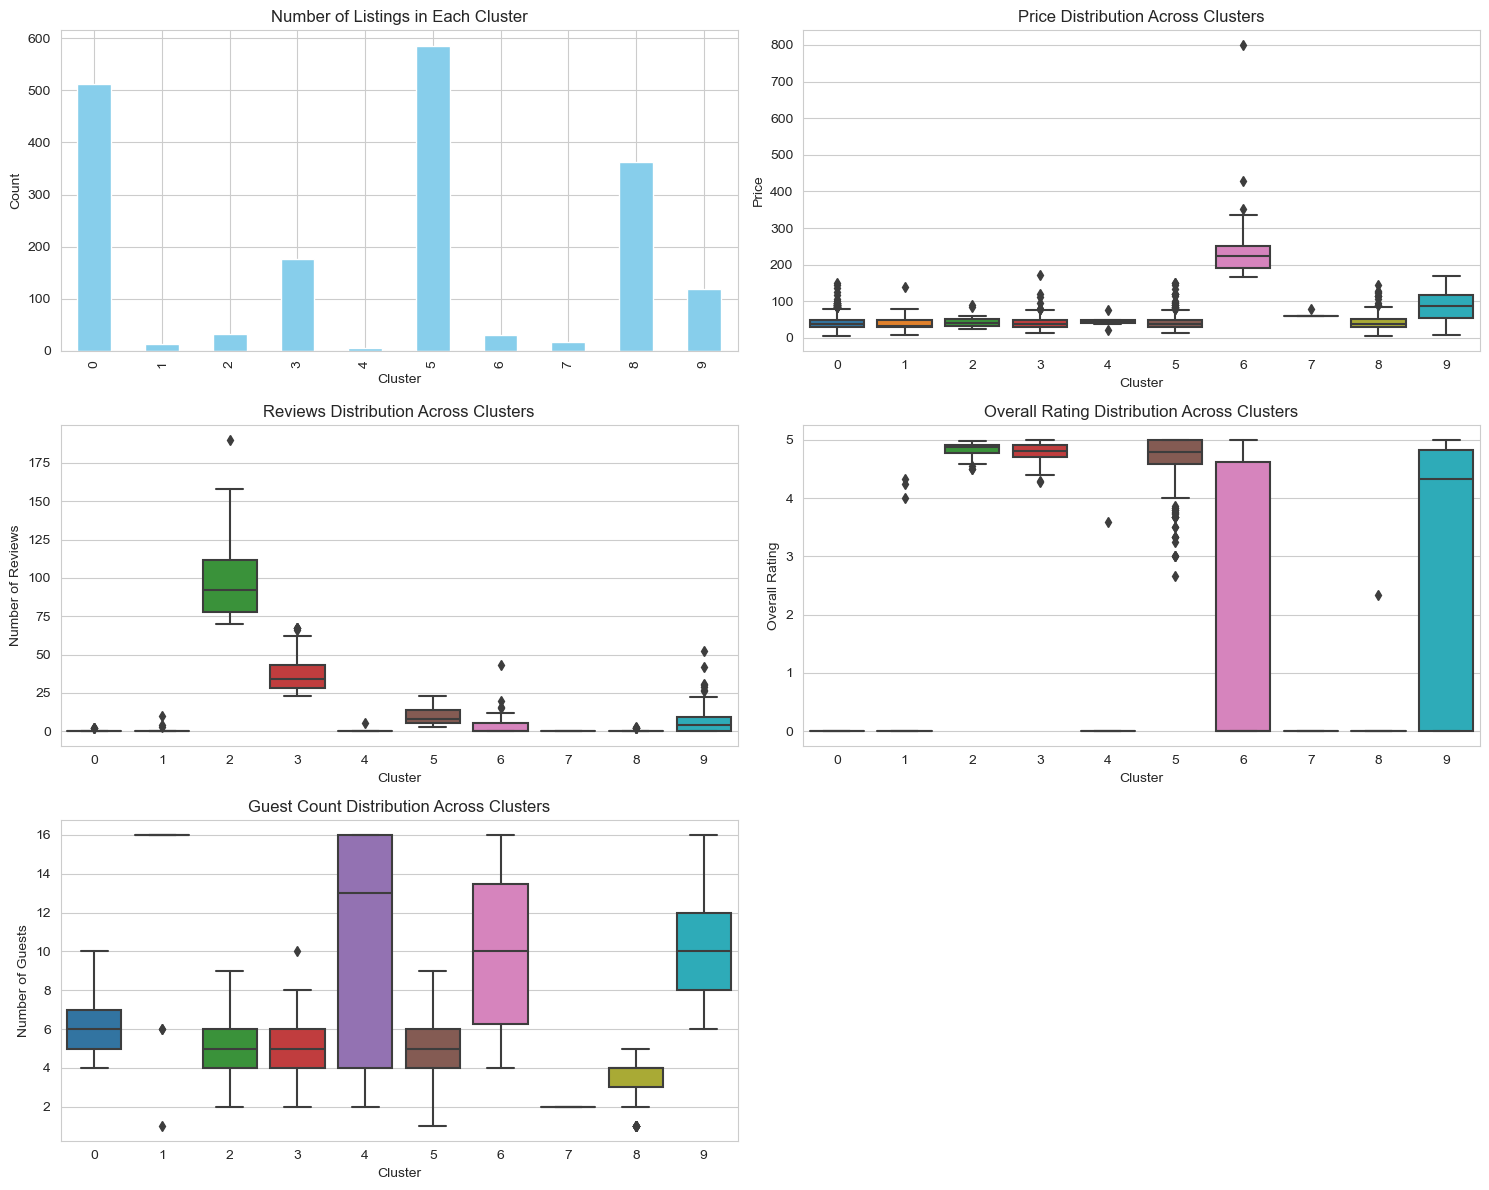

In [205]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # 3 rows, 2 columns

# Bar plot for the number of listings in each cluster
df1['Cluster'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Number of Listings in Each Cluster")
axes[0, 0].set_xlabel("Cluster")
axes[0, 0].set_ylabel("Count")

# Box plot for price distribution across clusters
sns.boxplot(x='Cluster', y='Price', data=df1, ax=axes[0, 1])
axes[0, 1].set_title("Price Distribution Across Clusters")
axes[0, 1].set_xlabel("Cluster")
axes[0, 1].set_ylabel("Price")

# Box plot for reviews distribution across clusters
sns.boxplot(x='Cluster', y='n_reviews', data=df1, ax=axes[1, 0])
axes[1, 0].set_title("Reviews Distribution Across Clusters")
axes[1, 0].set_xlabel("Cluster")
axes[1, 0].set_ylabel("Number of Reviews")

# Box plot for overall rating distribution across clusters
sns.boxplot(x='Cluster', y='Overall_rating', data=df1, ax=axes[1, 1])
axes[1, 1].set_title("Overall Rating Distribution Across Clusters")
axes[1, 1].set_xlabel("Cluster")
axes[1, 1].set_ylabel("Overall Rating")

# Box plot for guest count distribution across clusters
sns.boxplot(x='Cluster', y='n_guest', data=df1, ax=axes[2, 0])
axes[2, 0].set_title("Guest Count Distribution Across Clusters")
axes[2, 0].set_xlabel("Cluster")
axes[2, 0].set_ylabel("Number of Guests")

# Hide empty subplot
axes[2, 1].axis('off')
# Adjust layout and display
plt.tight_layout()
plt.savefig('visualization.png', dpi=500, bbox_inches='tight')
plt.show()


**1. Number of Listings in Each Cluster**
* Cluster 0 and 5 have the highest number of listings, suggesting these clusters represent the most common types of properties.
* Clusters like 1 and 4 have significantly fewer listings, possibly representing unique or niche properties.
  
**2. Price Distribution Across Clusters**
* Cluster 6 stands out with an extremely high median price, far above other clusters. This indicates it contains luxury properties or high-end accommodations.
* Clusters like 4 and 3 have lower price ranges, suggesting they cater to budget travelers.
  
**3. Reviews Distribution Across Clusters** 
* Cluster 2 has the highest number of reviews, implying it contains popular and frequently booked properties.
* Clusters like 0, 4, 7 and 8 have very few reviews, indicating they may be newer listings, less popular, or specialized accommodations.
  
**4. Overall Rating Distribution Across Clusters**  
* Clusters 2, 3 exhibit high overall ratings, indicating properties in these clusters are well-received by guests.
* Cluster 0 has a median rating of 0, suggesting incomplete or unreviewed listings.
  
**5. Guest Count Distribution Across Clusters**
* Cluster14 accommodates the highest number of guests, making it ideal for large groups or families.
* Clusters like 4, 6 and 9 also accommodate more guests but with slightly different features.


In [209]:
df1.groupby('Cluster')[numerical_features].median()


,Price,n_reviews,Overall_rating,n_guest,n_bedroom,n_bed,n_bath
Cluster,,,,,,,
0,38.0,0.0,0.00,6.0,2.0,5.0,1.0
1,32.0,0.0,0.00,16.0,14.0,28.0,6.0
2,40.0,92.0,4.88,5.0,2.0,4.0,1.0
3,37.0,34.0,4.81,5.0,2.0,4.0,1.0
4,46.5,0.0,0.00,13.0,40.0,50.0,37.5
5,37.0,8.0,4.80,5.0,2.0,4.0,1.0
6,223.5,0.0,0.00,10.0,4.0,6.0,3.0
7,60.0,0.0,0.00,2.0,1.0,50.0,1.0
8,38.0,0.0,0.00,4.0,1.0,2.0,1.0


**Cluster 6:**
* High price ($223 median).
* No reviews and ratings, likely due to exclusivity or targeting a specific audience.
* High capacity (10 guests), indicating it caters to big-sized groups.

**Cluster 2:**
* High rating (4.88) and high reviews (92).
* Balanced price ($40), making it attractive for both budget and quality-conscious travelers.

**Cluster 1:**
* Cheapest cluster ($32 median price).
* High guest capacity (16), indicating value-for-money accommodations for large groups.

**Cluster 9:**
* Higher price ($88) and moderate capacity (10 guests).
* Slightly lower overall rating (4), possibly due to price-performance mismatches.

**Actionable Recommendations:**

**For Hosts:**
* Listings in Cluster 6 should focus on targeting affluent customers with premium services, as they represent luxury accommodations.
* Hosts in Cluster 1 can market their properties to large groups looking for affordable stays.

**For Travelers:**
* Budget travelers should look at clusters like 2 and 3 for cost-effective and well-rated accommodations.

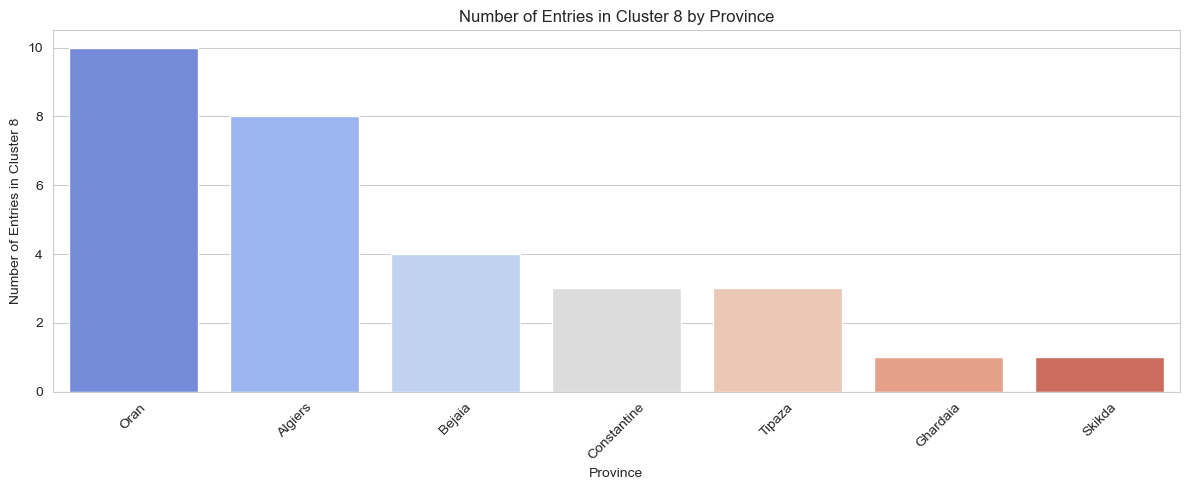

In [214]:
top_provinces_by_cluster_count = df1[df1['Cluster'] == 2].groupby('Province').size().sort_values(ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 5))

sns.barplot(
    x=top_provinces_by_cluster_count.index,
    y=top_provinces_by_cluster_count.values,
    palette='coolwarm',
    ax=ax1
)

ax1.set_xlabel('Province')
ax1.set_ylabel('Number of Entries in Cluster 8')
ax1.set_title('Number of Entries in Cluster 8 by Province')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Comparative Analysis

In [226]:
threshold_price = df['Price'].quantile(0.25)  # Lowest 25% of prices
threshold_value = df['Value'].quantile(0.75)  # Highest 25% of value ratings

best_bang_for_buck = df[(df['Price'] <= threshold_price) & (df['Value'] >= threshold_value)]
best_bang_for_buck[['Title', 'Price', 'Value', 'Overall_rating']]

,Title,Price,Value,Overall_rating
9,Holiday apartment,25.0,5.0,4.86
24,Spacious and comfortable apartment in Béjaïa,30.0,5.0,5.00
65,f2 akid lotfi low price 5th floor with an elev...,25.0,5.0,5.00
79,"Comfort F2,with Garage.Maraval",27.0,5.0,5.00
101,Change of scenery Guaranteed.,23.0,5.0,5.00
...,...,...,...,...
2335,(2-2) Cleanliness Safety Amenities,26.0,4.9,4.88
2359,Loft Matarba,18.0,4.9,4.86
2410,Wonderful F3 type home,25.0,5.0,5.00
2413,New F3 home in a Cosy decor in Algiers,25.0,5.0,5.00


* These listings are the "hidden gems" that provide excellent value at a lower cost.

In [228]:
comments_df.head()

,ID,Rating,Date,Duration
0,6,4.0,November 2024,a few nights
1,6,5.0,July 2024,a few nights
2,6,5.0,June 2024,a few nights
3,6,4.0,May 2024,over a week
4,7,5.0,November 2024,one night


In [230]:
comment_data = comments_df.copy()

In [232]:
comment_data['Year'] = comment_data['Date'].apply(lambda x: x.split(" ")[-1] if isinstance(x, str) else 'Unknown')
comment_data['Month'] = comment_data['Date'].apply(lambda x: x.split(" ")[0] if isinstance(x, str) else 'Unknown')

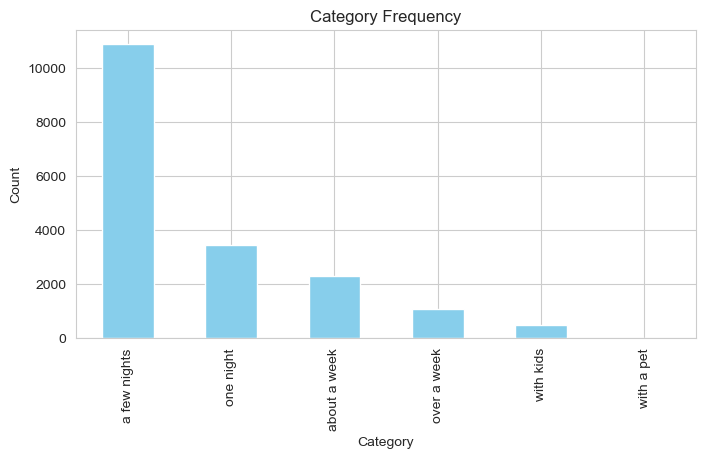

In [234]:
plt.figure(figsize=(8, 4))
category_counts = comment_data['Duration'].value_counts()
category_counts.plot(kind='bar', color='skyblue', grid=True)

# Set titles and labels
plt.title("Category Frequency")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

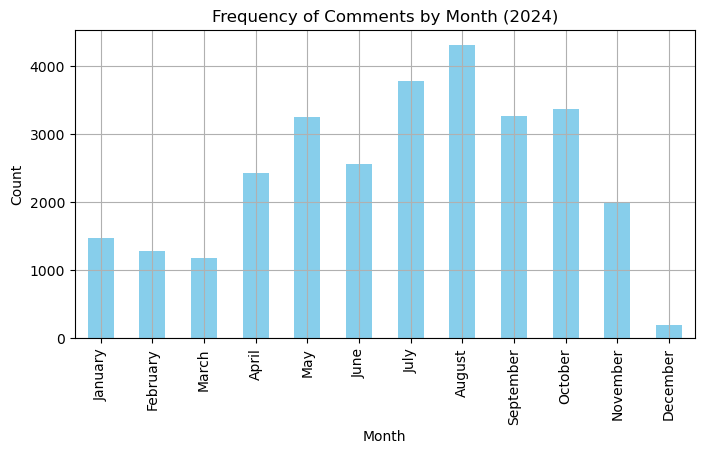

In [219]:
comment_data['Date'] = comment_data['Date'].fillna('Unknown')

comment_data['Year'] = comment_data['Date'].apply(lambda x: x.split(" ")[-1] if isinstance(x, str) else 'Unknown')
comment_data['Month'] = comment_data['Date'].apply(lambda x: x.split(" ")[0] if isinstance(x, str) else 'Unknown')

category_counts = comment_data.loc[comment_data['Year'] == '2024', "Month"].value_counts()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

category_counts = category_counts[month_order]

plt.figure(figsize=(8, 4))
category_counts.plot(kind='bar', color='skyblue', grid=True)

plt.title("Frequency of Comments by Month (2024)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


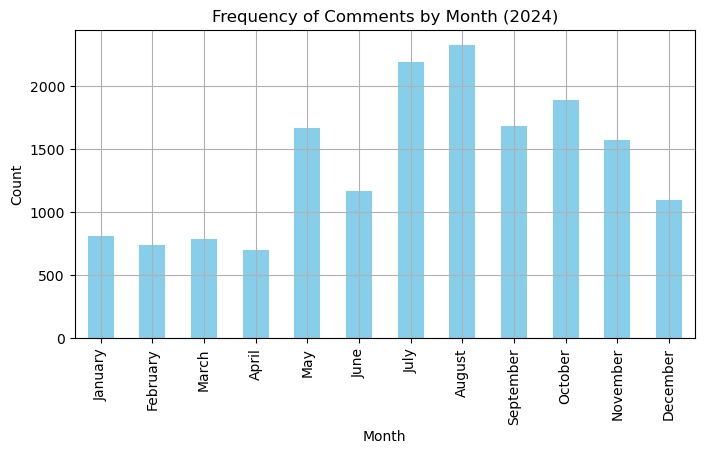

In [221]:
category_counts = comment_data.loc[comment_data['Year'] == '2023', "Month"].value_counts()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

category_counts = category_counts[month_order]

plt.figure(figsize=(8, 4))
category_counts.plot(kind='bar', color='skyblue', grid=True)

plt.title("Frequency of Comments by Month (2024)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()